Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses.

DATA SET LINK
https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view?usp=sharing

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [304]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [305]:
df=pd.read_csv("/content/drive/MyDrive/train-chennai-sale.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [306]:
df.shape

(7109, 22)

In [307]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [308]:
#As property Id(PRT_ID), will not affect the Sales Price, so it can be dropped
#REG_FEE, COMMIS columns,Do not have an effect on Sales Price, as they are computed after sales price is
# determined, we can drop them
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis='columns')

In [309]:
df.shape

(7109, 19)

In [310]:
#Duplicate Removal 
df.duplicated().sum()

0

In [311]:
#df = df.drop_duplicates()
df.shape

(7109, 19)

In [312]:
df.head()

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004  04-05-2011            131        1.0         1.0   
1  Anna Nagar      1986  19-12-2006             26        2.0         1.0   
2       Adyar       909  04-02-2012             70        1.0         1.0   
3   Velachery      1855  13-03-2010             14        3.0         2.0   
4  Karapakkam      1226  05-10-2009             84        1.0         1.0   

   N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes  15-05-1967  Commercial        AllPub   Paved   
1       5  AbNormal         No  22-12-1995  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes  09-02-1992  Commercial           ELO  Gravel   
3       5    Family         No  18-03-1988      Others       NoSewr    Paved   
4       3  AbNormal        Yes  13-10-1979      Others        AllPub  Gravel   

  MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE  
0      A       4.0          3.9         4.9       4.330      7600000  
1     RH       4.9          4.2         2.5       3.765     21717770  
2     RL       4.1          3.8         2.2       3.090     13159200  
3      I       4.7          3.9         3.6       4.010      9630290  
4      C       3.0          2.5         4.1       3.290      7406250

<AxesSubplot:>

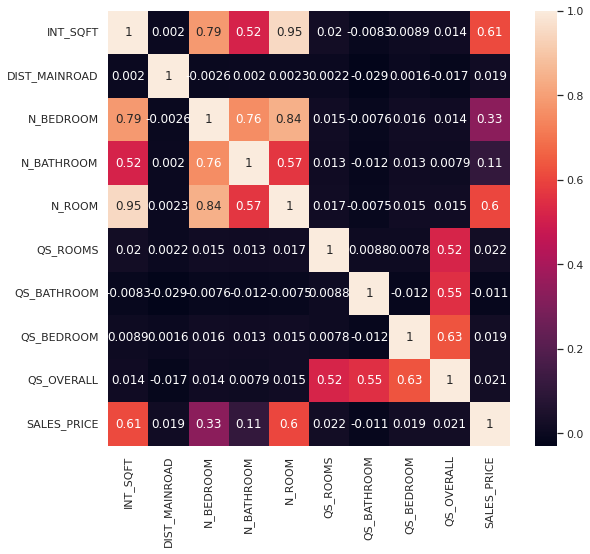

In [313]:
plt.figure(figsize = (9,8))
sns.heatmap(df.corr(),annot=True)

In [314]:
df.isnull().sum()# There are some null values, we will remove them in individual feature cleaning exercise

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

For each fearure do:
A) Cleaning
B) EDA
1)  feature distribution plot
2)  feature vs target feature plot

In [315]:
#Cleaning: 
df.dtypes #data.col = data.col.astype('int64')

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [316]:
df.AREA.head(5)#  data type of AREA column,  is object, which is Pandas representation of strings so correct

0    Karapakkam
1    Anna Nagar
2         Adyar
3     Velachery
4    Karapakkam
Name: AREA, dtype: object

In [317]:
#CLEANING ON AREA COLUMN, checking for spelling mistakes
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AREA', ylabel='count'>

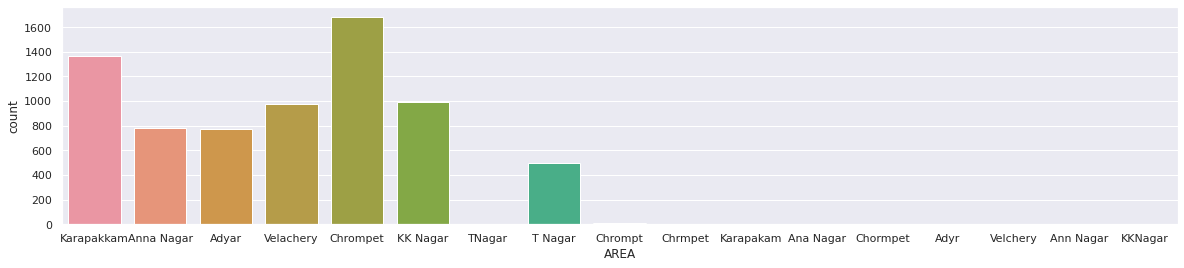

In [318]:

plt.figure(figsize=(20,4))
sns.countplot(df['AREA']) # We can see in below plot we have wrong spelling of TNagar, it is represented as T Nagar, so need to merge them

In [319]:
df[df['AREA']=='TNagar']

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
24    TNagar      1972  13-05-2013            111        2.0         1.0   
1378  TNagar      1782  13-05-2013            168        1.0         1.0   
1656  TNagar      1856  20-08-2013             76        2.0         1.0   
2009  TNagar      1597  09-04-2013             62        1.0         1.0   
6317  TNagar      1504  19-07-2014            146        1.0         1.0   

      N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE UTILITY_AVAIL  \
24         5      AdjLand         No  14-05-2008      Others       NoSewr    
1378       4       Family         No  18-05-1993       House       NoSewr    
1656       5  Normal Sale         No  30-08-1972  Commercial       NoSewr    
2009       4  Normal Sale        Yes  16-04-1984      Others           ELO   
6317       4      Partial        Yes  25-07-1990  Commercial           ELO   

         STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
24    No Access     RH       4.1          4.4         2.8       3.590   
1378     Gravel     RH       4.8          4.4         4.3       4.475   
1656      Paved     RH       3.8          3.7         3.5       3.640   
2009      Paved     RH       2.9          4.8         2.7       3.285   
6317  No Access     RH       2.9          2.5         4.2       3.385   

      SALES_PRICE  
24       13922760  
1378     12105050  
1656     19550620  
2009     12569440  
6317     16595430

In [320]:
df[df['AREA']=='T Nagar']

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
25    T Nagar      1685  19-07-2014            105        1.0         1.0   
29    T Nagar      1806  18-08-2013            138        2.0         1.0   
32    T Nagar      1721  26-03-2012            117        1.0         1.0   
46    T Nagar      1882  18-11-2006            189        2.0         1.0   
50    T Nagar      1655  21-05-2014             19        1.0         1.0   
...       ...       ...         ...            ...        ...         ...   
7066  T Nagar      1756  08-07-2012            153        1.0         1.0   
7068  T Nagar      1700  08-08-2008            164        1.0         1.0   
7076  T Nagar      1921  22-09-2013            188        2.0         1.0   
7081  T Nagar      1946  04-12-2013            148        2.0         1.0   
7100  T Nagar      1733  24-02-2010            191        1.0         1.0   

      N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE UTILITY_AVAIL  \
25         4       Family         No  27-07-1980       House       NoSewr    
29         5       Family         No  27-08-1978       House        NoSeWa   
32         4      AdjLand        Yes  31-03-1992      Others           ELO   
46         5     AbNormal        Yes  23-11-1985      Others           ELO   
50         4     AbNormal         No  29-05-1980      Others        AllPub   
...      ...          ...        ...         ...         ...           ...   
7066       4  Normal Sale        Yes  11-07-2001      Others        NoSeWa   
7068       4  Normal Sale         No  10-08-2003  Commercial           ELO   
7076       5       Family        Yes  26-09-1998  Commercial        NoSeWa   
7081       5      AdjLand         No  11-12-1985      Others        NoSeWa   
7100       4     AbNormal        Yes  02-03-1985  Commercial        NoSeWa   

         STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
25       Gravel     RM       2.8          4.4         4.0       3.740   
29        Paved     RH       4.1          5.0         3.0       3.830   
32        Paved     RM       2.0          2.8         2.9       2.605   
46       Gravel     RM       3.9          4.5         4.7         NaN   
50       Gravel     RH       2.1          4.3         3.9       3.460   
...         ...    ...       ...          ...         ...         ...   
7066  No Access     RL       4.3          2.2         3.0       3.190   
7068      Paved     RM       3.0          3.3         2.6       2.895   
7076     Gravel     RM       4.8          2.7         3.7       3.780   
7081     Gravel     RH       2.7          3.8         2.9       3.065   
7100  No Access     RL       3.4          3.7         2.1       2.890   

      SALES_PRICE  
25       12601080  
29       11338200  
32       14874380  
46       16051580  
50       12548930  
...           ...  
7066     13754600  
7068     19798550  
7076     23013500  
7081     14280890  
7100     19501600  

[496 rows x 19 columns]

In [321]:
#The values of AREA are having wrong spelling, so they have to be corrected and merged

In [322]:
df['AREA']=df['AREA'].replace({'T Nagar':'TNagar','Chrompt':'Chrompet','Chrmpet':'Chrompet','Karapakam':'Karapakkam',
                    'Chormpet':'Chrompet','Ana Nagar':'AnnaNagar','Adyr':'Adyar','Ann Nagar':'AnnaNagar','Anna Nagar':'AnnaNagar',
                    'KK Nagar':'KKNagar','Velchery':'Velachery',
                    })

In [323]:
df['AREA'].unique()

array(['Karapakkam', 'AnnaNagar', 'Adyar', 'Velachery', 'Chrompet',
       'KKNagar', 'TNagar'], dtype=object)

In [324]:
df[df['AREA']=='TNagar']

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
24    TNagar      1972  13-05-2013            111        2.0         1.0   
25    TNagar      1685  19-07-2014            105        1.0         1.0   
29    TNagar      1806  18-08-2013            138        2.0         1.0   
32    TNagar      1721  26-03-2012            117        1.0         1.0   
46    TNagar      1882  18-11-2006            189        2.0         1.0   
...      ...       ...         ...            ...        ...         ...   
7066  TNagar      1756  08-07-2012            153        1.0         1.0   
7068  TNagar      1700  08-08-2008            164        1.0         1.0   
7076  TNagar      1921  22-09-2013            188        2.0         1.0   
7081  TNagar      1946  04-12-2013            148        2.0         1.0   
7100  TNagar      1733  24-02-2010            191        1.0         1.0   

      N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE UTILITY_AVAIL  \
24         5      AdjLand         No  14-05-2008      Others       NoSewr    
25         4       Family         No  27-07-1980       House       NoSewr    
29         5       Family         No  27-08-1978       House        NoSeWa   
32         4      AdjLand        Yes  31-03-1992      Others           ELO   
46         5     AbNormal        Yes  23-11-1985      Others           ELO   
...      ...          ...        ...         ...         ...           ...   
7066       4  Normal Sale        Yes  11-07-2001      Others        NoSeWa   
7068       4  Normal Sale         No  10-08-2003  Commercial           ELO   
7076       5       Family        Yes  26-09-1998  Commercial        NoSeWa   
7081       5      AdjLand         No  11-12-1985      Others        NoSeWa   
7100       4     AbNormal        Yes  02-03-1985  Commercial        NoSeWa   

         STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
24    No Access     RH       4.1          4.4         2.8       3.590   
25       Gravel     RM       2.8          4.4         4.0       3.740   
29        Paved     RH       4.1          5.0         3.0       3.830   
32        Paved     RM       2.0          2.8         2.9       2.605   
46       Gravel     RM       3.9          4.5         4.7         NaN   
...         ...    ...       ...          ...         ...         ...   
7066  No Access     RL       4.3          2.2         3.0       3.190   
7068      Paved     RM       3.0          3.3         2.6       2.895   
7076     Gravel     RM       4.8          2.7         3.7       3.780   
7081     Gravel     RH       2.7          3.8         2.9       3.065   
7100  No Access     RL       3.4          3.7         2.1       2.890   

      SALES_PRICE  
24       13922760  
25       12601080  
29       11338200  
32       14874380  
46       16051580  
...           ...  
7066     13754600  
7068     19798550  
7076     23013500  
7081     14280890  
7100     19501600  

[501 rows x 19 columns]

In [325]:
df[df['AREA']=='T Nagar']# No values, it is merged

Empty DataFrame
Columns: [AREA, INT_SQFT, DATE_SALE, DIST_MAINROAD, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, DATE_BUILD, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, SALES_PRICE]
Index: []

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AREA', ylabel='count'>

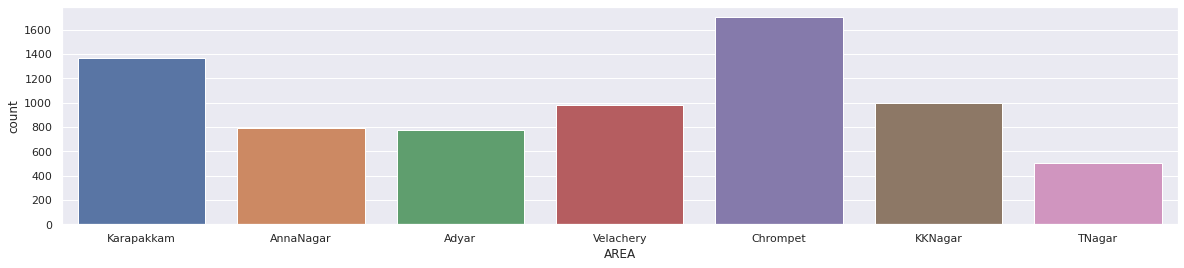

In [326]:
plt.figure(figsize=(20,4))
sns.countplot(df['AREA'])# Spelling is corrected

In [327]:
#Cleaning of AREA: Detect and Remove NAN values
df['AREA'].isnull().sum()# No Null Values detected

0

In [328]:
##CLEANING: Outlier Detection And treatment On AREA Column, NOT Needed as Categorical Column


In [329]:
#CLEANING To Check AREA column is having structured data or not
# Yes it is structured categorical data, with unique values of columns

In [330]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [331]:
#Distribution plot 

#sns.distplot(df['AREA'],bins=15) # Cannot use displot with on non-numeric varaible
# We can use count plot, which is shown above in line 26
# We will try to use sea born bar plot
# We will demonstare pandas bar plot also

In [332]:
#BAR PLOT of AREA 
sns.set(rc={"figure.figsize" :(20,4)})
df_count_Area=df.groupby("AREA").AREA.count().sort_values(ascending=False).to_frame()
df_count_Area
#sns.barplot(x='AREA',data=df)# Cannot use barplot with single feature, so following code to generate data frames with 2 columns
#from AREA feature along with frequency

AREA
AREA            
Chrompet    1702
Karapakkam  1366
KKNagar      997
Velachery    981
AnnaNagar    788
Adyar        774
TNagar       501

In [333]:
df_count_Area.describe()

AREA
count     7.000000
mean   1015.571429
std     402.171960
min     501.000000
25%     781.000000
50%     981.000000
75%    1181.500000
max    1702.000000

In [334]:
df_count_Area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Chrompet to TNagar
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AREA    7 non-null      int64
dtypes: int64(1)
memory usage: 112.0+ bytes


In [335]:
df_count_Area.rename(columns={"AREA":"Count_Area"},inplace=True)
df_count_Area = df_count_Area.reset_index()

<AxesSubplot:xlabel='AREA', ylabel='Count_Area'>

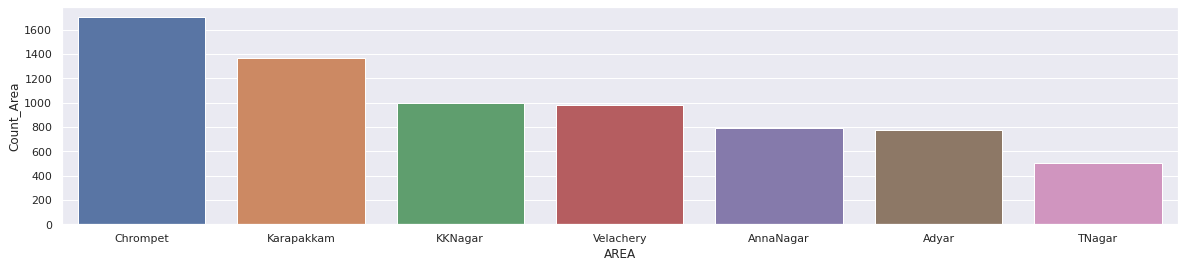

In [336]:
#BAR PLOT
sns.barplot(x='AREA',y='Count_Area',data=df_count_Area)# Cannot use barplot with single feature

In [337]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KKNagar        997
Velachery      981
AnnaNagar      788
Adyar          774
TNagar         501
Name: AREA, dtype: int64

<AxesSubplot:>

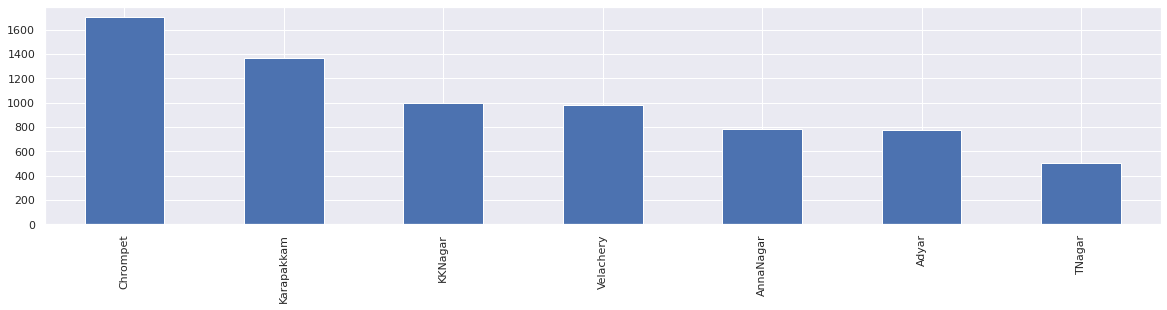

In [338]:
df['AREA'].value_counts().plot.bar()# Method to sort bar sizes, using pandas plot method

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AREA', ylabel='count'>

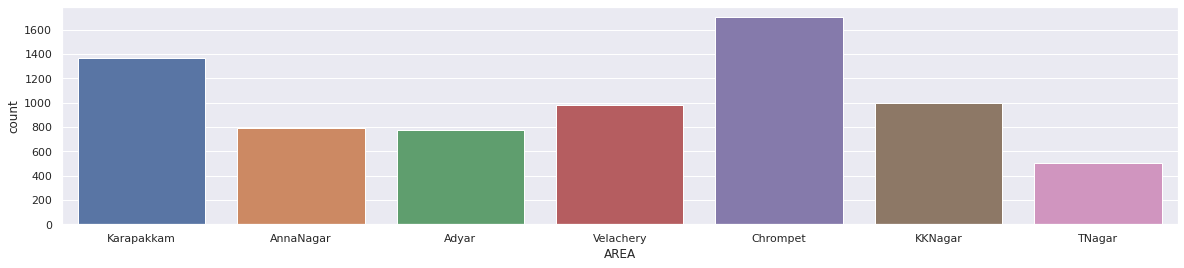

In [339]:

plt.figure(figsize=(20,4))
sns.countplot(df['AREA'])

In [340]:
# We can see from different plots maximum sales are in Chrompet Area
# TARGET VS FEATURE PLOT

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

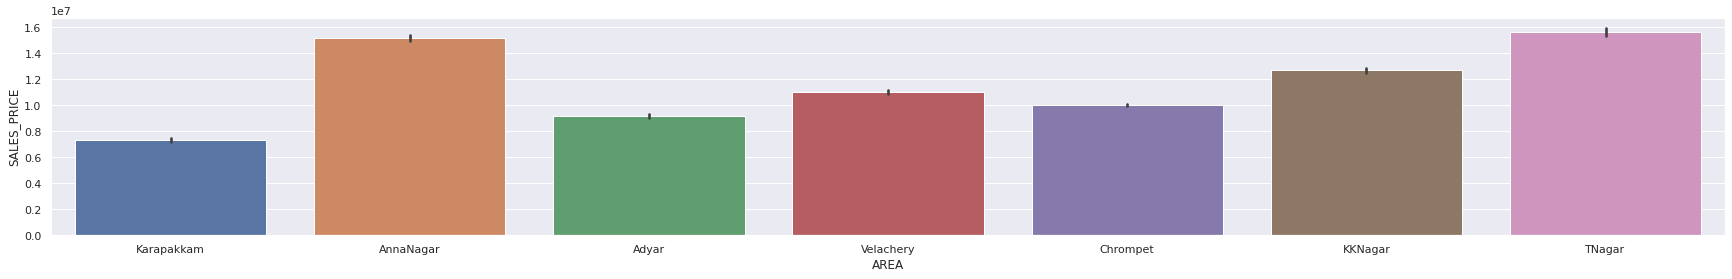

In [341]:
#FOR CAT VS CONT WE CANNOT USE REL PLOT
plt.figure(figsize=(30,4))
#sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.sort_values('SALES_PRICE').AREA)# Not working sorting
sns.barplot(x='AREA',y='SALES_PRICE',data=df)

In [342]:
sns.set(rc={"figure.figsize" :(20,4)})
df_count_sp=df.groupby("AREA").SALES_PRICE.max().sort_values(ascending=False).to_frame()
df_count_sp

SALES_PRICE
AREA                   
TNagar         23667340
AnnaNagar      23407860
KKNagar        20246360
Velachery      18298710
Adyar          17360470
Chrompet       16026600
Karapakkam     14486250

In [343]:
df_count_sp.rename(columns={"SALES_PRICE":"Count_SP"},inplace=True)
df_count_sp = df_count_sp.reset_index()

<AxesSubplot:xlabel='AREA', ylabel='Count_SP'>

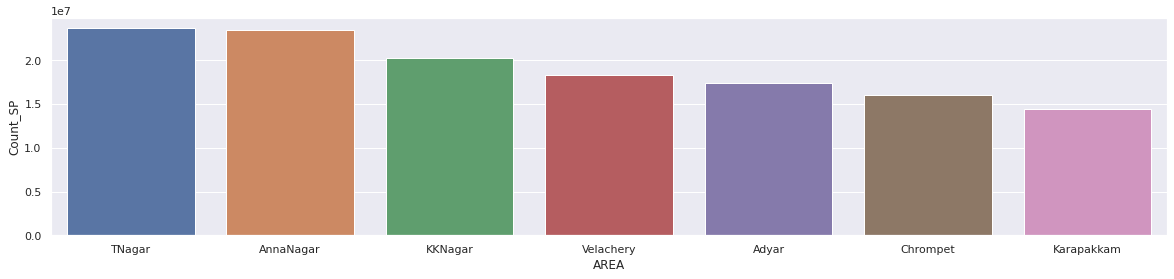

In [344]:
sns.barplot(x='AREA',y='Count_SP',data=df_count_sp)

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

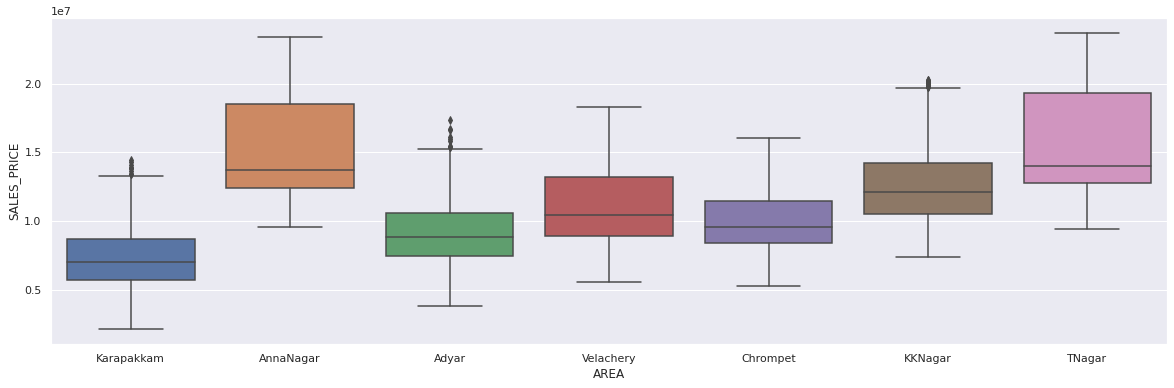

In [345]:
plt.figure(figsize=(20,6))
sns.boxplot(x='AREA',y='SALES_PRICE',data=df)

In [346]:
#EDA Interpretation Highest property Rate in TNagr and AnnaNagar and lowest property rates in Adyar

In [347]:
#Checking Corelation of AREA with TARGET(ONLY DONE FOR CONT VS CONT, not category vs cont)


In [348]:
#DATA CLEANING AND EDA DONE FOR AREA COLUMN

In [349]:
#DATA CLEANING AND EDA FOR INT_SQFT COLUMN

In [350]:
#Cleaning: 
df.dtypes #data.col = data.col.astype('int64')

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [351]:
df['INT_SQFT'] # Check data types of INT_SQFT column, it is int, which is correct

0       1004
1       1986
2        909
3       1855
4       1226
        ... 
7104     598
7105    1897
7106    1614
7107     787
7108    1896
Name: INT_SQFT, Length: 7109, dtype: int64

In [352]:
#CLEANING ON INT_SQFT COLUMN, checking for spelling mistakes(Not needed as integer column)

In [353]:
#Cleaning of INT_SQFT: Detect and Remove NAN values
df['INT_SQFT'].isnull().sum()# No Null Values detected

0

In [354]:
df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [355]:
df.shape

(7109, 19)

In [356]:
##CLEANING: Outlier Detection And treatment On INT_SQFT Column
#Outlier detection and Treatment NO outlier found, so not replacing df with df1
df1=df
q1=df1['INT_SQFT'].quantile(0.25)
q3=df1['INT_SQFT'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("lower limit",ll,"Upper limit",ul)
df1=df1[~((df1['INT_SQFT']<ll) | (df1['INT_SQFT']>ul))]
print(df1.shape)
#df=df1
df.shape

751.0
lower limit -133.5 Upper limit 2870.5
(7109, 19)


(7109, 19)

In [357]:
#CLEANING To Check INT_SQFT column is having structured data or not
#Not needed as continuous column

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

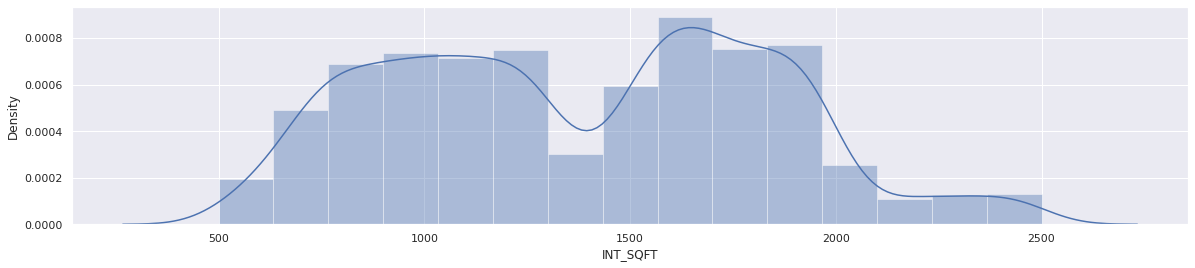

In [358]:
#EDA FREQUENCY PLOT  ON INT_SQFT COLUMN (Numeric Column)
sns.distplot(df['INT_SQFT'],bins=15)

<AxesSubplot:xlabel='INT_SQFT', ylabel='Count'>

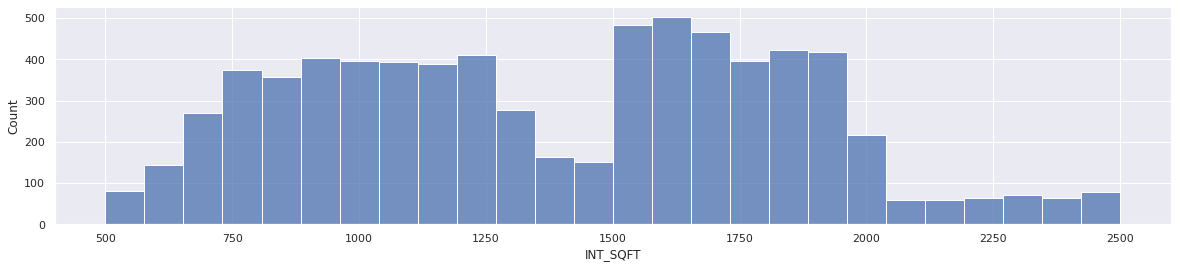

In [359]:
sns.histplot(df['INT_SQFT'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INT_SQFT'>

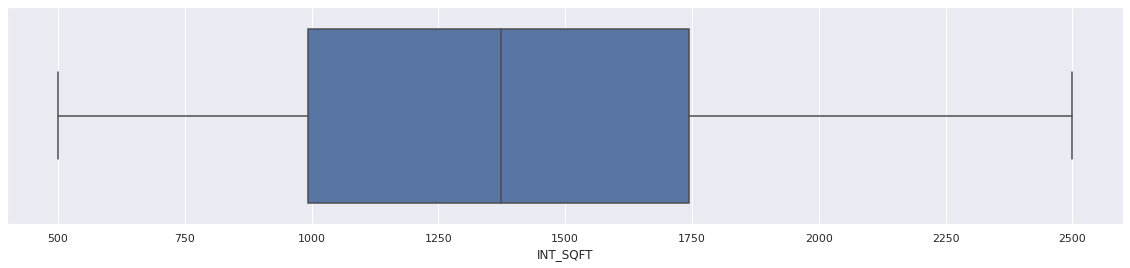

In [360]:
sns.boxplot(df['INT_SQFT'])

Interpretation Maximum properties are in 1000 to 1750 sqft

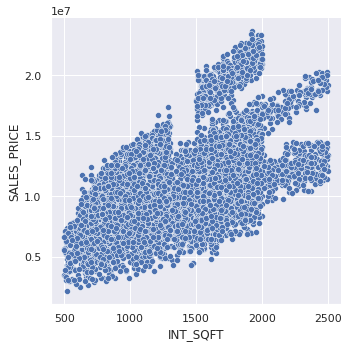

In [361]:
sns.relplot(x='INT_SQFT',y='SALES_PRICE',data=df)#As sqft Area increases, sales price increases

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

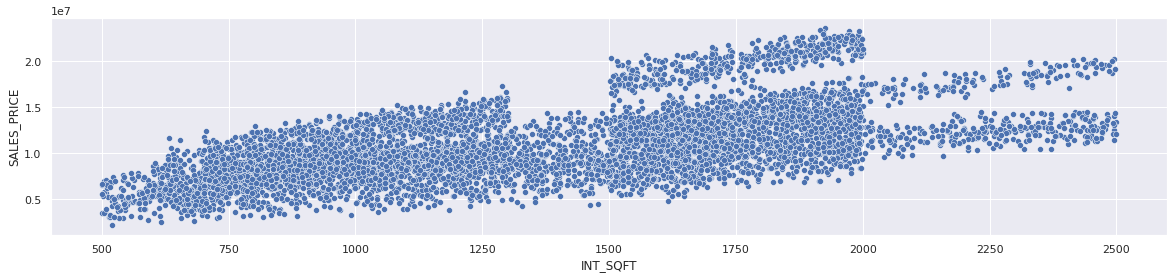

In [362]:
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',data=df)

In [363]:
df[['INT_SQFT','SALES_PRICE']].corr()# 0.61 correlation is fine, feature is related to sales price positively

INT_SQFT  SALES_PRICE
INT_SQFT     1.000000     0.612125
SALES_PRICE  0.612125     1.000000

In [364]:
##DATA CLEANING AND EDA FOR DATE_SALE COLUMN && DATE_BUILD

In [365]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [366]:
#Cleaning on DATE_SALE feature

In [367]:
df['DATE_SALE']

0       04-05-2011
1       19-12-2006
2       04-02-2012
3       13-03-2010
4       05-10-2009
           ...    
7104    03-01-2011
7105    08-04-2004
7106    25-08-2006
7107    03-08-2009
7108    13-07-2005
Name: DATE_SALE, Length: 7109, dtype: object

In [368]:
#CLEANING ON DATE_SALE Format is object it should be date time
df.DATE_SALE = pd.to_datetime(df.DATE_SALE, format='%d-%m-%Y')
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD               object
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

In [369]:
df.DATE_SALE =df['DATE_SALE'].dt.year# Taking year of sale

In [370]:
df.head(5)

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004       2011            131        1.0         1.0   
1   AnnaNagar      1986       2006             26        2.0         1.0   
2       Adyar       909       2012             70        1.0         1.0   
3   Velachery      1855       2010             14        3.0         2.0   
4  Karapakkam      1226       2009             84        1.0         1.0   

   N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes  15-05-1967  Commercial        AllPub   Paved   
1       5  AbNormal         No  22-12-1995  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes  09-02-1992  Commercial           ELO  Gravel   
3       5    Family         No  18-03-1988      Others       NoSewr    Paved   
4       3  AbNormal        Yes  13-10-1979      Others        AllPub  Gravel   

  MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE  
0      A       4.0          3.9         4.9       4.330      7600000  
1     RH       4.9          4.2         2.5       3.765     21717770  
2     RL       4.1          3.8         2.2       3.090     13159200  
3      I       4.7          3.9         3.6       4.010      9630290  
4      C       3.0          2.5         4.1       3.290      7406250

In [371]:
#CLEANING ON DATE_SALE Missing values
df.DATE_SALE.isnull().sum()

0

In [372]:
df['DATE_SALE'].head()

0    2011
1    2006
2    2012
3    2010
4    2009
Name: DATE_SALE, dtype: int64

In [373]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE          int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DATE_SALE'>

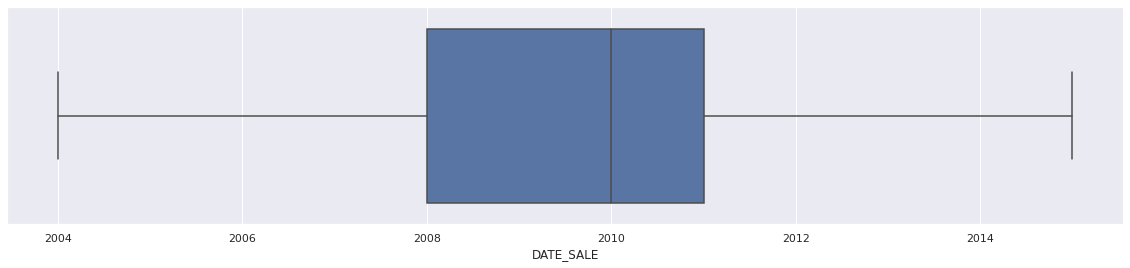

In [374]:
sns.boxplot(df['DATE_SALE'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DATE_SALE', ylabel='Density'>

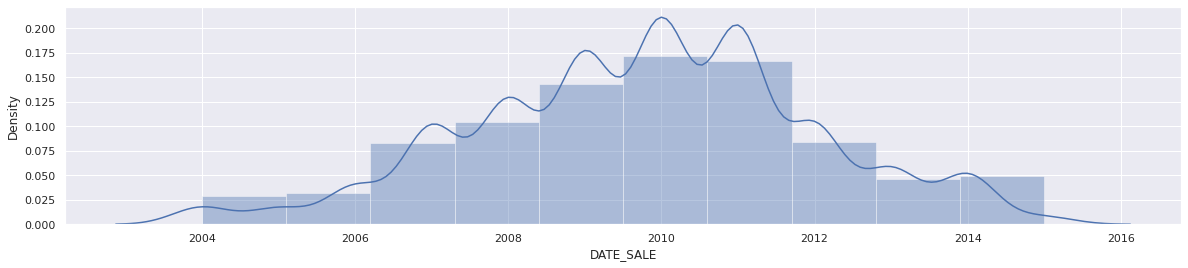

In [375]:
#EDA FREQUENCY PLOT  ON DATE_SALE COLUMN (Numeric Column)
sns.distplot(df['DATE_SALE'],bins=10)

In [376]:
##CLEANING: Outlier Detection And treatment On INT_SQFT Column
#Outlier detection and Treatment on copy of data, DATE CAN TAKE ANY VALUE, SO NOT Treating, also no outliers found
df1=df
q1=df1['DATE_SALE'].quantile(0.25)
q3=df1['DATE_SALE'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
print("lower limit",ll,"Upper limit",ul)
df1=df1[~((df1['DATE_SALE']<ll) | (df1['DATE_SALE']>ul))]
print(df1.shape)
#df=df1
df.shape

3.0
lower limit 2003.5 Upper limit 2015.5
(7109, 19)


(7109, 19)

In [377]:
df.head(5)

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004       2011            131        1.0         1.0   
1   AnnaNagar      1986       2006             26        2.0         1.0   
2       Adyar       909       2012             70        1.0         1.0   
3   Velachery      1855       2010             14        3.0         2.0   
4  Karapakkam      1226       2009             84        1.0         1.0   

   N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes  15-05-1967  Commercial        AllPub   Paved   
1       5  AbNormal         No  22-12-1995  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes  09-02-1992  Commercial           ELO  Gravel   
3       5    Family         No  18-03-1988      Others       NoSewr    Paved   
4       3  AbNormal        Yes  13-10-1979      Others        AllPub  Gravel   

  MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE  
0      A       4.0          3.9         4.9       4.330      7600000  
1     RH       4.9          4.2         2.5       3.765     21717770  
2     RL       4.1          3.8         2.2       3.090     13159200  
3      I       4.7          3.9         3.6       4.010      9630290  
4      C       3.0          2.5         4.1       3.290      7406250

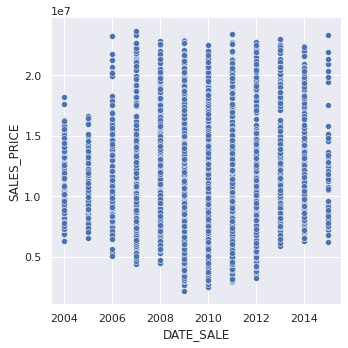

In [378]:
#DATE_SALE VS TARGET
sns.relplot(x='DATE_SALE',y='SALES_PRICE',data=df)# No relation between date of sale vs sales price

In [379]:
df[['DATE_SALE','SALES_PRICE']].corr()# Not corelated

DATE_SALE  SALES_PRICE
DATE_SALE     1.000000     0.000906
SALES_PRICE   0.000906     1.000000

In [380]:
#Trying corelation with square of 

df['transformed'] = np.power(df['DATE_SALE'],2)


In [381]:
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000     0.000999
SALES_PRICE     0.000999     1.000000

In [382]:

df['transformed'] = np.power(df['DATE_SALE'],3)
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000     0.001093
SALES_PRICE     0.001093     1.000000

In [383]:
df['transformed'] = np.power(df['DATE_SALE'],1/2)
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000     0.000859
SALES_PRICE     0.000859     1.000000

In [384]:
df['transformed'] = np.power(df['DATE_SALE'],np.log([2]))
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000     0.000877
SALES_PRICE     0.000877     1.000000

In [385]:
# No Correlation feature can be dropped

In [386]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE          int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
transformed      float64
dtype: object

In [387]:
##CLEANING ON DATE_BUILD Format is object it should be date time
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD, format='%d-%m-%Y')
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE                 int64
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
transformed             float64
dtype: object

In [388]:
df.DATE_BUILD =df['DATE_BUILD'].dt.year# Taking year of build

In [389]:
df.DATE_BUILD.isnull().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DATE_BUILD', ylabel='Density'>

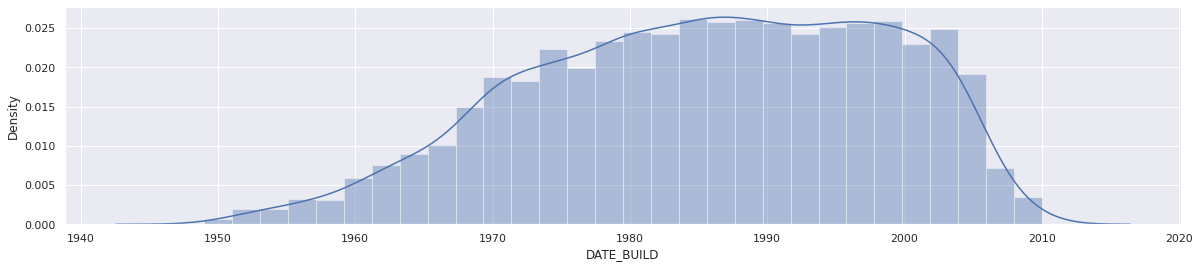

In [390]:
sns.distplot(df['DATE_BUILD'])

In [391]:
df.DATE_BUILD.describe()# NO Outliers

count    7109.000000
mean     1985.491912
std        12.648859
min      1949.000000
25%      1976.000000
50%      1986.000000
75%      1996.000000
max      2010.000000
Name: DATE_BUILD, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DATE_BUILD'>

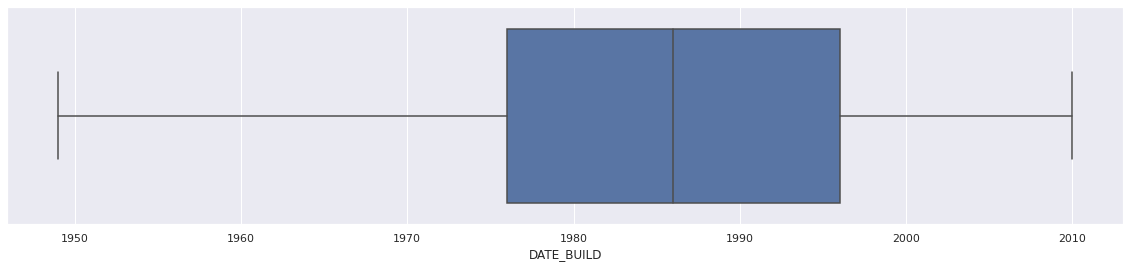

In [392]:
sns.boxplot(df['DATE_BUILD'])

In [393]:
#Checking relationship b/w DATE_BUILD and Target
df[['DATE_BUILD','SALES_PRICE']].corr()# No Correlation

DATE_BUILD  SALES_PRICE
DATE_BUILD     1.000000     0.116043
SALES_PRICE    0.116043     1.000000

In [394]:
df['transformed'] = np.power(df['DATE_BUILD'],2)#np.log([2]
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000     0.115951
SALES_PRICE     0.115951     1.000000

In [395]:
df['transformed'] = np.power(df['DATE_BUILD'],3)#np.log([2]
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000     0.115857
SALES_PRICE     0.115857     1.000000

In [396]:
df['transformed'] = np.power(df['DATE_BUILD'],np.log([2]))
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000     0.116072
SALES_PRICE     0.116072     1.000000

In [397]:
#DATE_BUILD' can be dropped 

In [398]:
#Creating new feature age of property using build and sale date, then will drop these columns
df['AGE']=df['DATE_SALE']-df['DATE_BUILD']
df

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004       2011            131        1.0         1.0   
1      AnnaNagar      1986       2006             26        2.0         1.0   
2          Adyar       909       2012             70        1.0         1.0   
3      Velachery      1855       2010             14        3.0         2.0   
4     Karapakkam      1226       2009             84        1.0         1.0   
...          ...       ...        ...            ...        ...         ...   
7104  Karapakkam       598       2011             51        1.0         1.0   
7105   Velachery      1897       2004             52        3.0         2.0   
7106   Velachery      1614       2006            152        2.0         1.0   
7107  Karapakkam       787       2009             40        1.0         1.0   
7108   Velachery      1896       2005            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD  ... UTILITY_AVAIL  \
0          3     AbNormal        Yes        1967  ...        AllPub   
1          5     AbNormal         No        1995  ...        AllPub   
2          3     AbNormal        Yes        1992  ...           ELO   
3          5       Family         No        1988  ...       NoSewr    
4          3     AbNormal        Yes        1979  ...        AllPub   
...      ...          ...        ...         ...  ...           ...   
7104       2      AdjLand         No        1962  ...           ELO   
7105       5       Family        Yes        1995  ...        NoSeWa   
7106       4  Normal Sale         No        1978  ...        NoSeWa   
7107       2      Partial        Yes        1977  ...           ELO   
7108       5      Partial        Yes        1961  ...           ELO   

         STREET MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0         Paved      A      4.0          3.9         4.9       4.330   
1        Gravel     RH      4.9          4.2         2.5       3.765   
2        Gravel     RL      4.1          3.8         2.2       3.090   
3         Paved      I      4.7          3.9         3.6       4.010   
4        Gravel      C      3.0          2.5         4.1       3.290   
...         ...    ...      ...          ...         ...         ...   
7104  No Access     RM      3.0          2.2         2.4       2.520   
7105  No Access     RH      3.6          4.5         3.3       3.920   
7106     Gravel      I      4.3          4.2         2.9       3.840   
7107      Paved     RL      4.6          3.8         4.1       4.160   
7108      Paved      I      3.1          3.5         4.3       3.640   

      SALES_PRICE  transformed  AGE  
0         7600000   191.907172   44  
1        21717770   193.796584   11  
2        13159200   193.594538   20  
3         9630290   193.324998   22  
4         7406250   192.717924   30  
...           ...          ...  ...  
7104      5353000   191.568911   49  
7105     10818480   193.796584    9  
7106      8351410   192.650419   28  
7107      8507000   192.582903   32  
7108      9976480   191.501227   44  

[7109 rows x 21 columns]

In [399]:
#Dropping columns

df.columns
#df=df.drop('transformed',axis='columns')
df=df.drop(['DATE_SALE','DATE_BUILD'],axis='columns')
df.head()
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'transformed', 'AGE'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

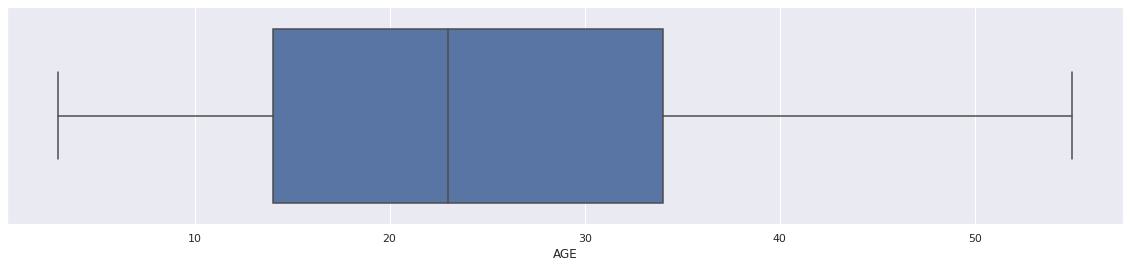

In [400]:
sns.boxplot(df['AGE'])

In [401]:
#Determine relation b/w AGE and target
df[['AGE','SALES_PRICE']].corr()# Not correlated

AGE  SALES_PRICE
AGE          1.000000    -0.118842
SALES_PRICE -0.118842     1.000000

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


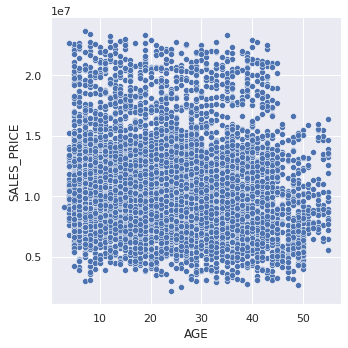

In [402]:
sns.relplot('AGE','SALES_PRICE',data=df)#No correlation

In [403]:
df['transformed'] = np.power(df['AGE'],np.log([2]))
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000    -0.115226
SALES_PRICE    -0.115226     1.000000

In [404]:
df['transformed'] = np.power(df['AGE'],2)
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000    -0.124443
SALES_PRICE    -0.124443     1.000000

In [405]:
#Dropping Age
df=df.drop(["AGE",'transformed'],axis='columns')
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

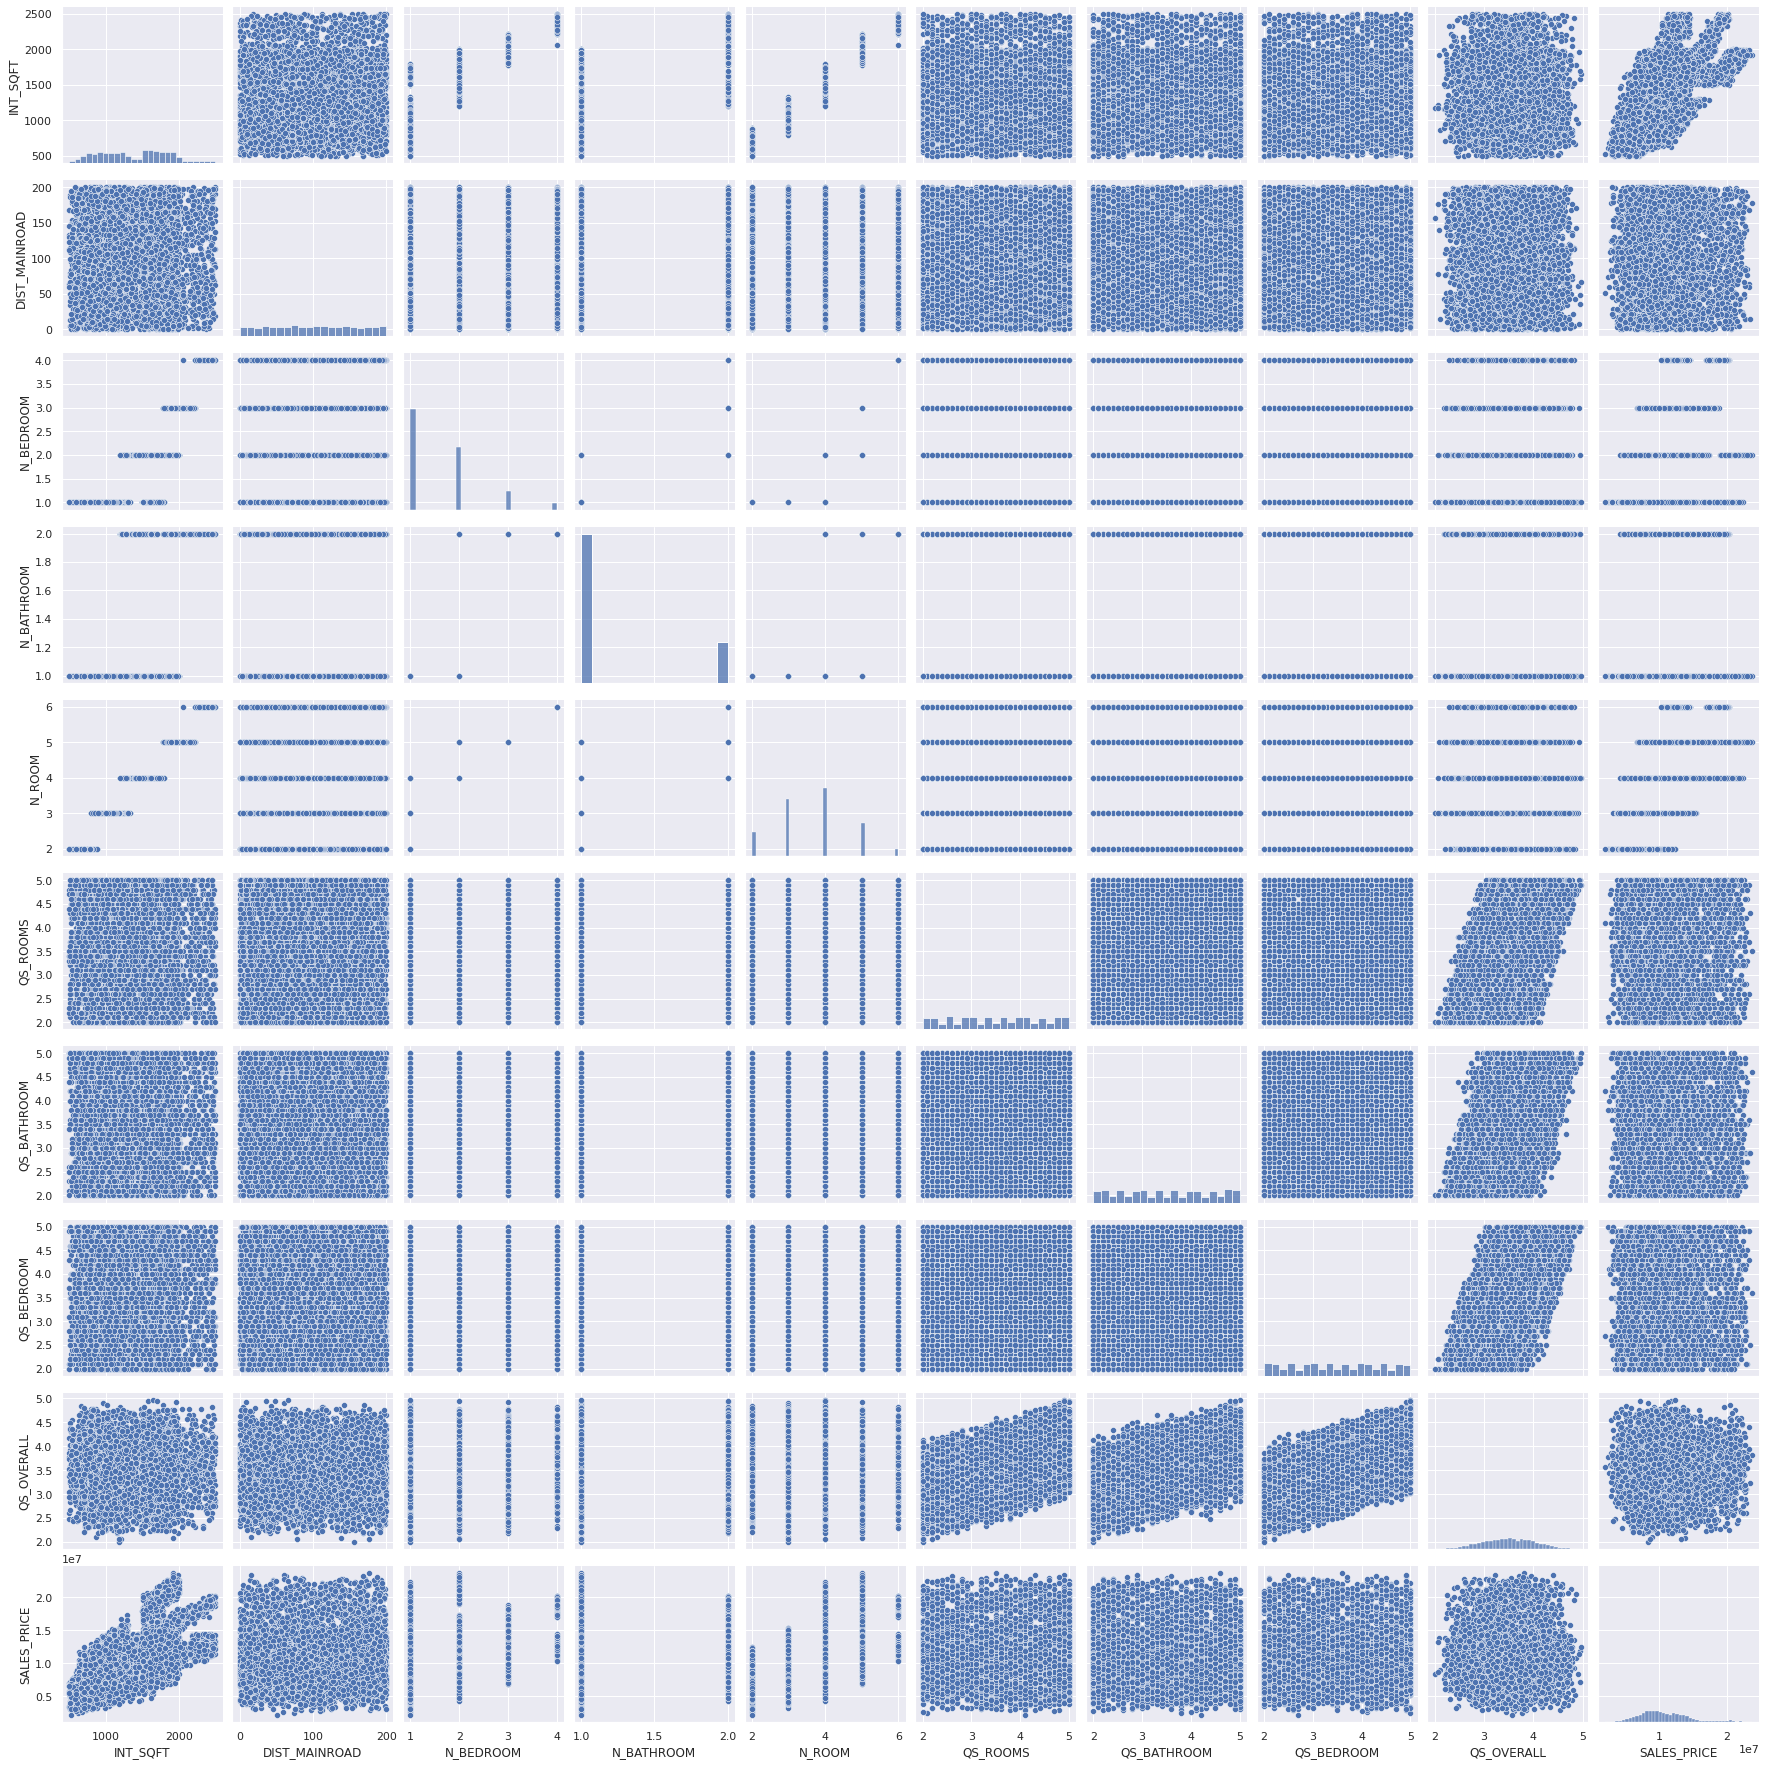

In [406]:
sns.pairplot(df)

In [407]:
###DATA CLEANING AND EDA FOR DIST_MAINROAD COLUMN 

In [408]:
df['DIST_MAINROAD'].isnull().sum()

0

In [409]:
df.dtypes# DIST_MAINROAD is continuous variable, so correct data type of int

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

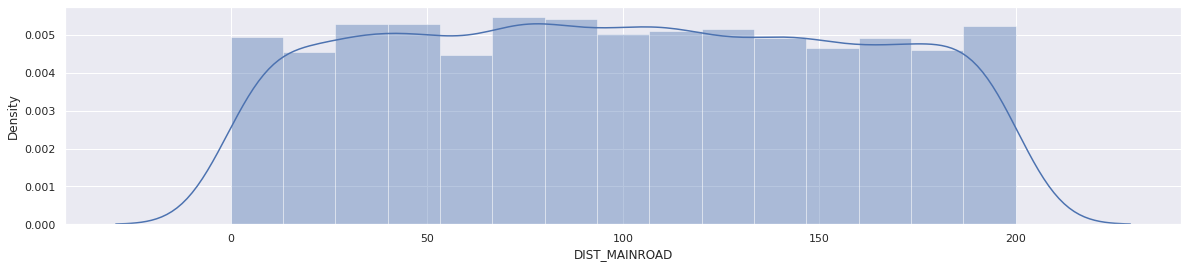

In [410]:
#EDA DIST_MAINROAD(Continuos Variable)
sns.distplot(df['DIST_MAINROAD'],bins=15)

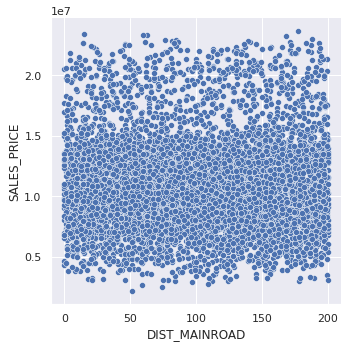

In [411]:
sns.relplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df)#No linear Relationship b/w Sales price and distance in main road

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

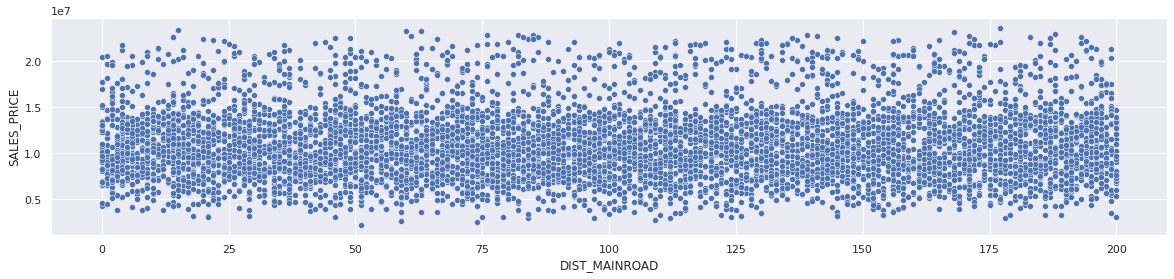

In [412]:
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df)

In [413]:
#Trying transformation
df['transformed'] = np.power(df['DIST_MAINROAD'],np.log([2]))
df[['transformed','SALES_PRICE']].corr()# Not corelated


transformed  SALES_PRICE
transformed     1.000000     0.016992
SALES_PRICE     0.016992     1.000000

In [414]:
#Trying transformation
#df['transformed'] = np.power(df['DIST_MAINROAD'],2)
df['transformed'] = np.power(df['DIST_MAINROAD'],3)
df[['transformed','SALES_PRICE']].corr()# Not corelated

transformed  SALES_PRICE
transformed     1.000000     0.022528
SALES_PRICE     0.022528     1.000000

In [415]:
#Dropping DIST_MAINROAD
df=df.drop('DIST_MAINROAD',axis='columns')
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'transformed'],
      dtype='object')

In [416]:
#Dropping transformed
df=df.drop('transformed',axis='columns')
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [417]:
#Cleaning and EDA on N_BEDROOM

In [418]:
df.N_BEDROOM.isnull().sum()

1

In [419]:
df[df.N_BEDROOM.isnull()]

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  \
4060  AnnaNagar      1556        NaN         1.0       4  Partiall         No   

     BUILDTYPE UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  QS_BATHROOM  \
4060     House       NoSewr   No Access     RM       4.8          2.7   

      QS_BEDROOM  QS_OVERALL  SALES_PRICE  
4060         2.0       3.155     10797790

In [420]:
df[ (df['AREA']=='AnnaNagar')&(df['N_ROOM']==4)&(df['N_BATHROOM']==1)                ]['N_BEDROOM'].value_counts()

1.0    472
Name: N_BEDROOM, dtype: int64

In [421]:
#From above 2 data, we can replace NAN value as 1, as for similar 472 samples value is 1
df['N_BEDROOM']=df['N_BEDROOM'].fillna(1.0)

In [422]:
df[df.N_BEDROOM.isnull()]

Empty DataFrame
Columns: [AREA, INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, SALES_PRICE]
Index: []

In [423]:
df.N_BEDROOM.describe()

count    7109.000000
mean        1.636939
std         0.802881
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [424]:
df.dtypes# data type of N_BEDROOM is float, it should be int

AREA              object
INT_SQFT           int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [425]:
df['N_BEDROOM']=df['N_BEDROOM'].astype('int64')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_BEDROOM', ylabel='Density'>

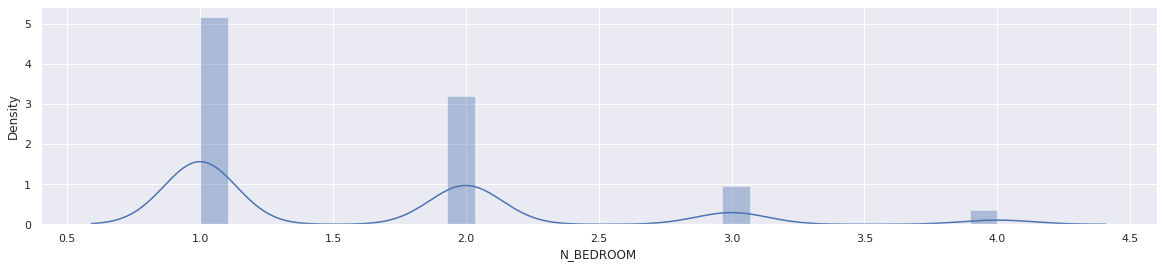

In [426]:
sns.distplot(df['N_BEDROOM'])#Maximum sales in 1 BHK flat

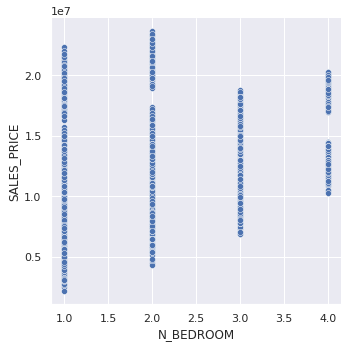

In [427]:
sns.relplot(x='N_BEDROOM',y='SALES_PRICE',data=df)#No correlation

In [428]:
df[['N_BEDROOM','SALES_PRICE']].corr()# But data shows correlation

N_BEDROOM  SALES_PRICE
N_BEDROOM     1.000000     0.330987
SALES_PRICE   0.330987     1.000000

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

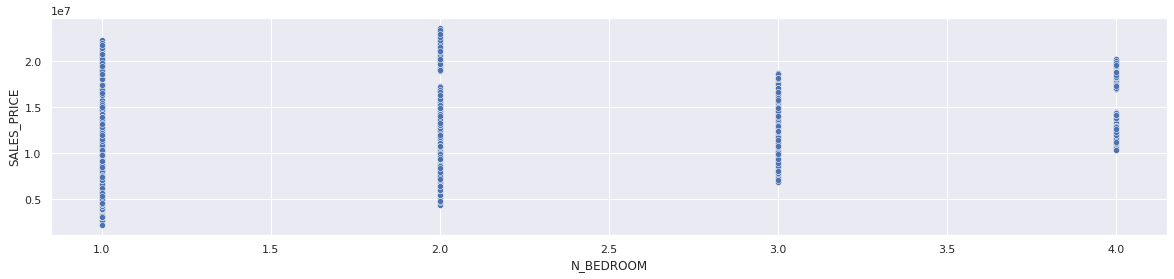

In [429]:
sns.scatterplot(x='N_BEDROOM',y='SALES_PRICE',data=df)#No correlation, looks like it needs to be treated as categorical column

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

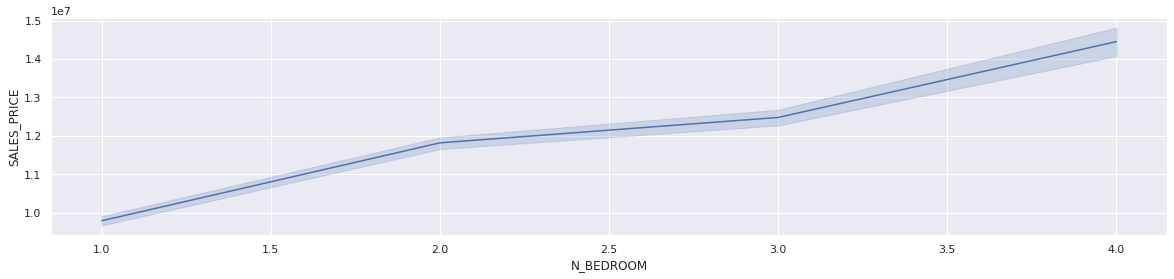

In [430]:
sns.lineplot( x='N_BEDROOM', y='SALES_PRICE', data=df)# shows linear corelation

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

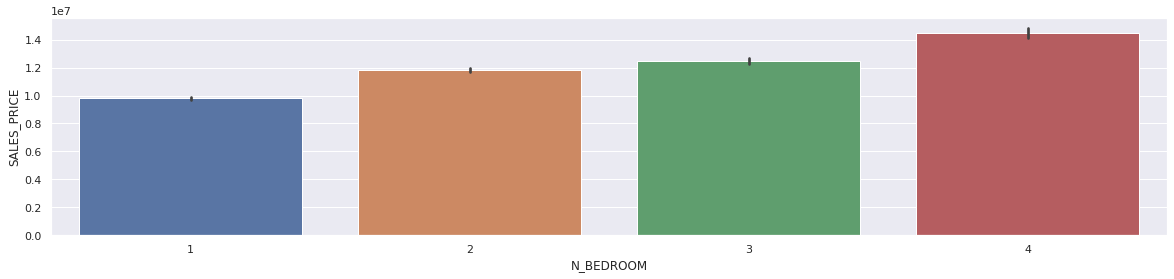

In [431]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)# As no of rooms increases price inc, so it is correct. So we need to treat as categorical columns

In [432]:
df.dtypes

AREA              object
INT_SQFT           int64
N_BEDROOM          int64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [433]:
##Cleaning and EDA on N_BATHROOM
# NULL value Detection and treatment
df['N_BATHROOM'].isnull().sum()


5

In [434]:
df[df.N_BATHROOM.isnull()]

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM    SALE_COND  \
70    AnnaNagar      1589          1         NaN       4      Partial   
5087   Chrompet      1016          1         NaN       3     AbNormal   
6134   Chrompet       916          1         NaN       3  Normal Sale   
6371   Chrompet      1035          1         NaN       3      Partial   
6535  AnnaNagar      1864          2         NaN       5       Family   

     PARK_FACIL BUILDTYPE UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  \
70           No    Others        AllPub     Gravel     RL       2.1   
5087        Yes    Others       NoSewr      Gravel     RM       3.2   
6134        Yes    Others           ELO      Paved     RL       3.4   
6371         No    Others        NoSeWa  No Access     RM       2.3   
6535        Yes    Others       NoSewr       Paved     RM       3.3   

      QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE  
70            2.5         4.5        3.16     12212350  
5087          4.2         2.0        3.24     10647920  
6134          3.5         3.0         NaN      8847420  
6371          3.5         3.2        3.05      8274200  
6535          3.7         4.7        3.96     15556920

In [435]:
df[ (df['AREA']=='Chrompet')&(df['N_ROOM']==3)&(df['N_BEDROOM']==1)                ]['N_BATHROOM'].value_counts()

1.0    1142
Name: N_BATHROOM, dtype: int64

In [436]:
# We have no of bathroom 1 for chrompet area and with no of room as 3 and numb of bedroom as 1 for 1142 records, we are filling null values by 1

In [437]:
df['N_BATHROOM']=df['N_BATHROOM'].fillna(1.0)

In [438]:
df[df.N_BATHROOM.isnull()]# No null values left

Empty DataFrame
Columns: [AREA, INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, SALES_PRICE]
Index: []

In [439]:
df.shape

(7109, 16)

In [440]:
df.dtypes

AREA              object
INT_SQFT           int64
N_BEDROOM          int64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [441]:
#Check data type Its float which is incorrect, it should be int
df.N_BATHROOM.head(5)


0    1.0
1    1.0
2    1.0
3    2.0
4    1.0
Name: N_BATHROOM, dtype: float64

In [442]:
df.N_BATHROOM=df.N_BATHROOM.astype('int')

In [443]:
df.dtypes

AREA              object
INT_SQFT           int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [444]:
df.N_BATHROOM.describe()# As we have some properties have 2 bathroom, and majority having 1 bathroom, as it actual data we will not treat outliers

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [445]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_BATHROOM', ylabel='Density'>

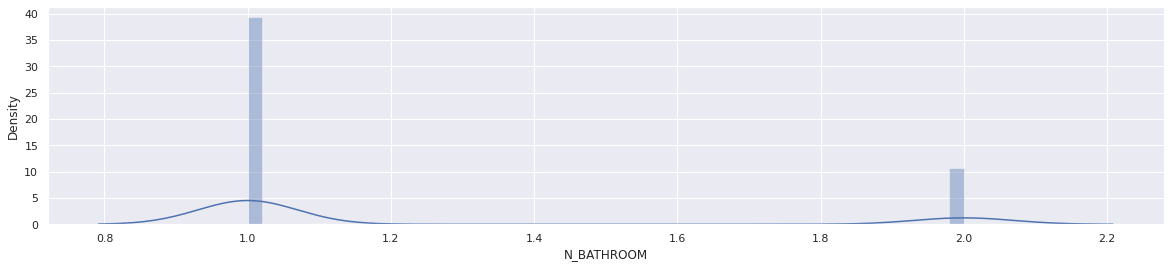

In [446]:
sns.distplot(df['N_BATHROOM'])

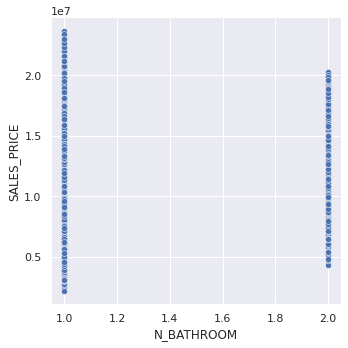

In [447]:
sns.relplot(x='N_BATHROOM',y='SALES_PRICE',data=df)#No correlation if treated as continuos data

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

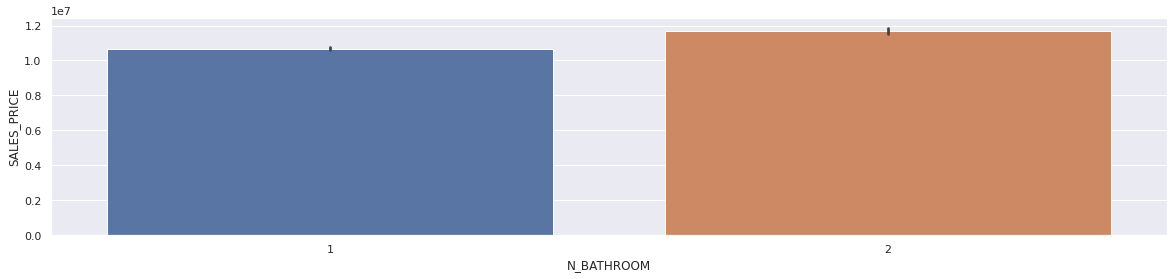

In [448]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)#Need to be treated as classification data

In [449]:
df[['N_BATHROOM','SALES_PRICE']].corr()


N_BATHROOM  SALES_PRICE
N_BATHROOM     1.000000     0.108834
SALES_PRICE    0.108834     1.000000

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

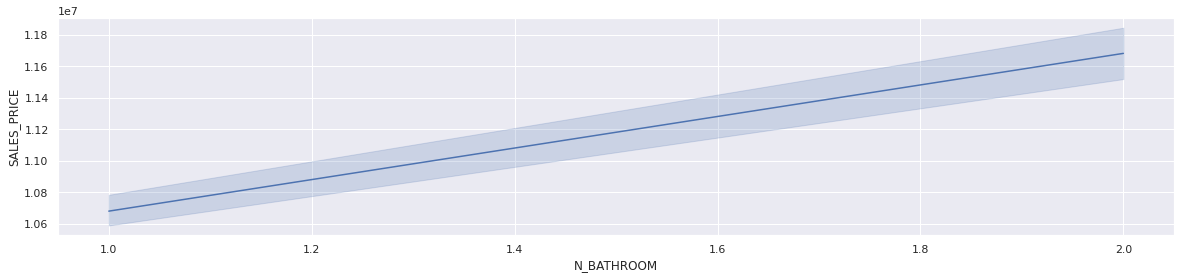

In [450]:
sns.lineplot( x=df['N_BATHROOM'], y=df['SALES_PRICE'], data=df)# Line plot shows the relation

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

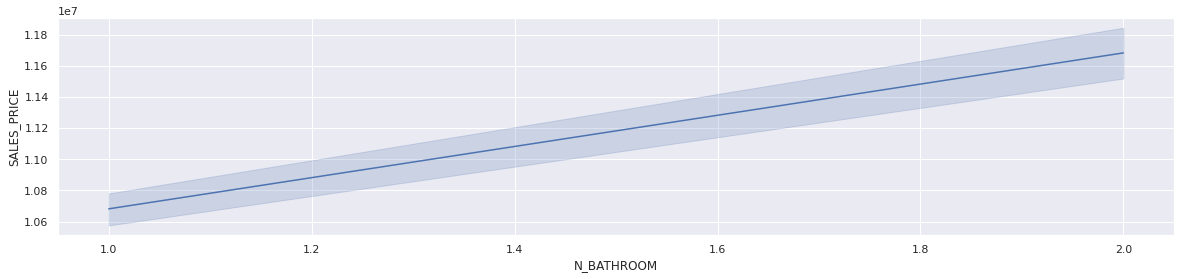

In [451]:
sns.lineplot( x='N_BATHROOM', y='SALES_PRICE', data=df)

In [452]:
df.dtypes

AREA              object
INT_SQFT           int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [453]:
# EDA and cleaning on N_ROOM 

In [454]:
df.N_ROOM.isnull().sum()

0

In [455]:
df.N_ROOM.dtypes

dtype('int64')

In [456]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_ROOM', ylabel='Density'>

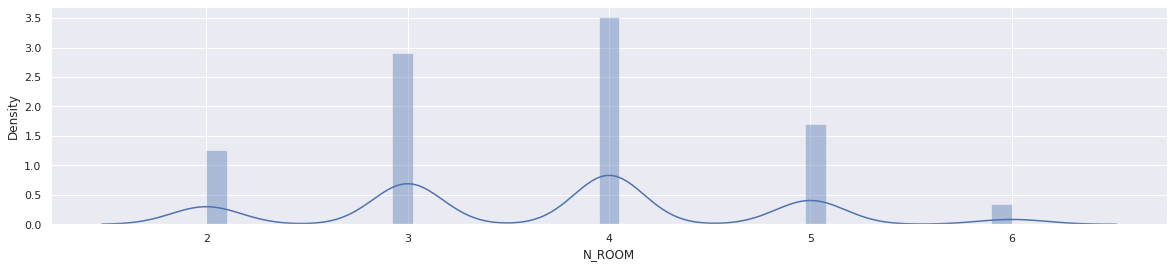

In [457]:
sns.distplot(df['N_ROOM'])

<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE'>

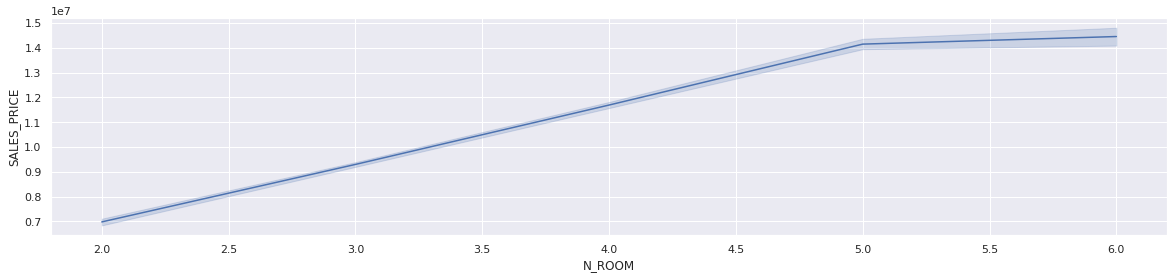

In [458]:
sns.lineplot(x='N_ROOM',y='SALES_PRICE',data=df)# Linear relation, price increases with number of rooms

In [459]:
df[['N_ROOM','SALES_PRICE']].corr()# Highly corelated

N_ROOM  SALES_PRICE
N_ROOM       1.00000      0.60276
SALES_PRICE  0.60276      1.00000

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N_ROOM'>

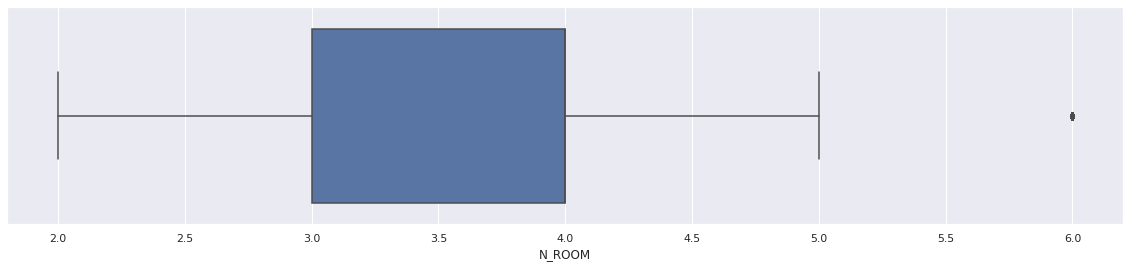

In [460]:
sns.boxplot(df['N_ROOM'])# 6 room is actual data we will not consider it outlier, as practically we can have total rooms as 6

In [461]:
df.dtypes

AREA              object
INT_SQFT           int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

#Cleaning and EDA on following features
QS_ROOMS         float64

QS_BATHROOM      float64

QS_BEDROOM       float64

QS_OVERALL       float64

In [462]:
df.QS_ROOMS.isnull().sum()

0

In [463]:
df.QS_ROOMS.value_counts()

2.5    265
3.8    259
3.6    255
4.6    252
3.9    245
4.9    242
3.4    240
4.7    239
3.3    239
4.8    239
4.2    239
2.6    237
2.1    236
3.1    230
5.0    228
3.0    228
3.5    227
2.8    226
4.3    225
2.3    224
4.1    222
2.9    220
4.4    219
4.5    218
4.0    218
2.2    213
2.4    208
3.2    208
3.7    205
2.0    203
2.7    200
Name: QS_ROOMS, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_ROOMS', ylabel='Density'>

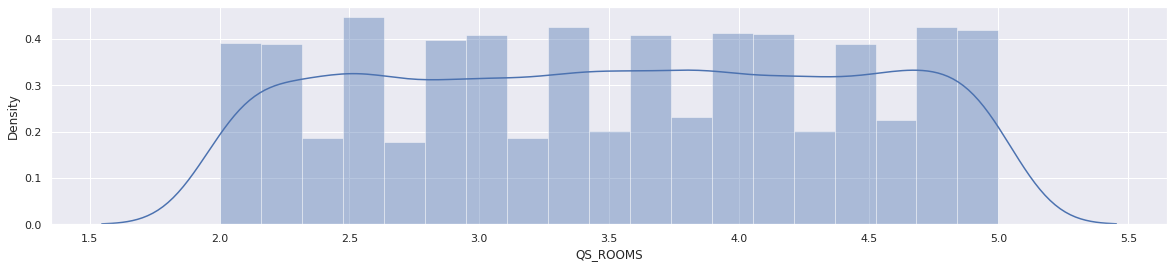

In [464]:
sns.distplot(df['QS_ROOMS'])

In [465]:
df[['QS_ROOMS','SALES_PRICE']].corr()# NOT corelated

QS_ROOMS  SALES_PRICE
QS_ROOMS     1.000000     0.021967
SALES_PRICE  0.021967     1.000000

<AxesSubplot:xlabel='QS_ROOMS', ylabel='SALES_PRICE'>

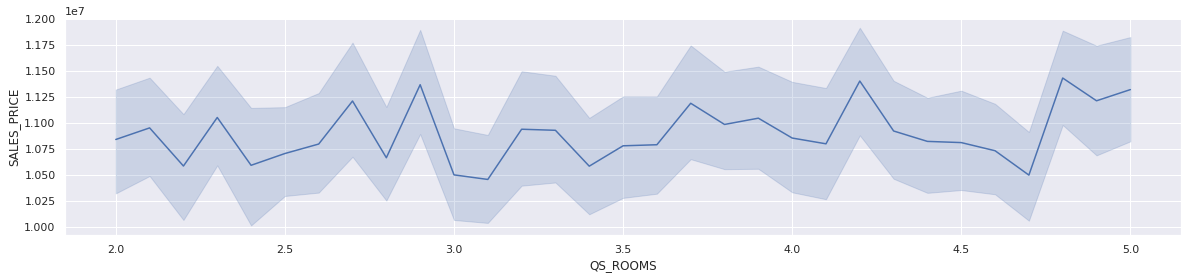

In [466]:
sns.lineplot(x='QS_ROOMS',y='SALES_PRICE',data=df)# Not linear relation, can be dropped.

<AxesSubplot:xlabel='QS_ROOMS', ylabel='SALES_PRICE'>

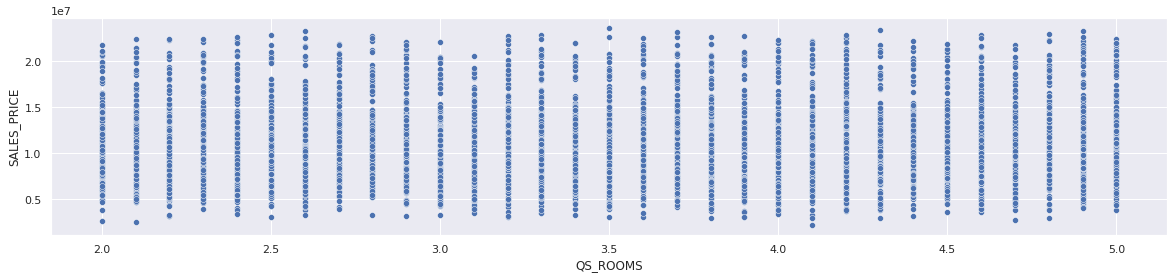

In [467]:
sns.scatterplot(x='QS_ROOMS',y='SALES_PRICE',data=df)

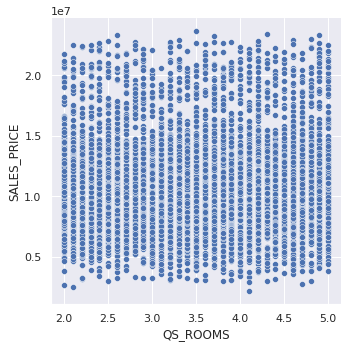

In [468]:
sns.relplot(x='QS_ROOMS',y='SALES_PRICE',data=df)

In [469]:
df.QS_BATHROOM.isnull().sum()

0

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='SALES_PRICE'>

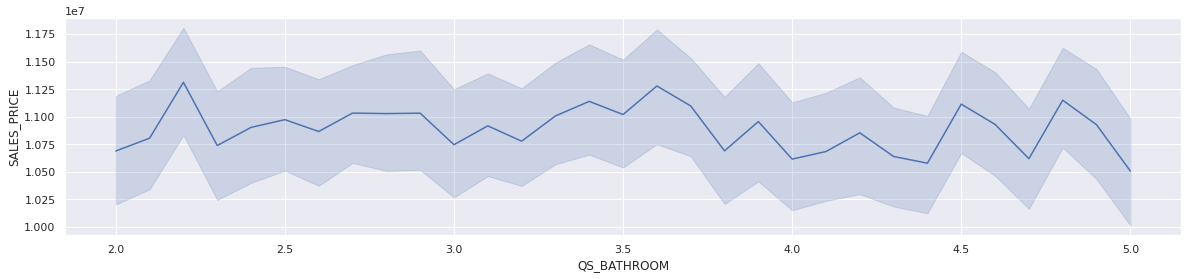

In [470]:
sns.lineplot(x='QS_BATHROOM',y='SALES_PRICE',data=df)# Not linear relation, can be dropped.

In [471]:
df[['QS_BATHROOM','SALES_PRICE']].corr()# NOT corelated

QS_BATHROOM  SALES_PRICE
QS_BATHROOM     1.000000    -0.011377
SALES_PRICE    -0.011377     1.000000

In [472]:
df.QS_BEDROOM.isnull().sum()

0

<AxesSubplot:xlabel='QS_BEDROOM', ylabel='SALES_PRICE'>

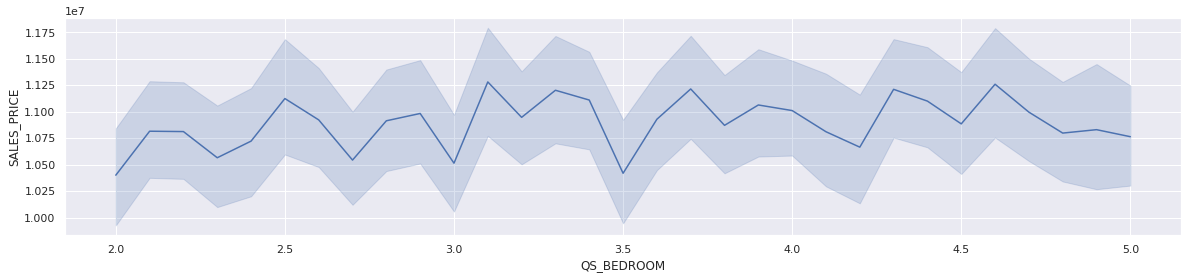

In [473]:
sns.lineplot(x='QS_BEDROOM',y='SALES_PRICE',data=df)# Not linear relation, can be dropped.

In [474]:
df[['QS_BEDROOM','SALES_PRICE']].corr()# NOT corelated

QS_BEDROOM  SALES_PRICE
QS_BEDROOM     1.000000     0.018804
SALES_PRICE    0.018804     1.000000

In [475]:
df.QS_OVERALL.isnull().sum()

48

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

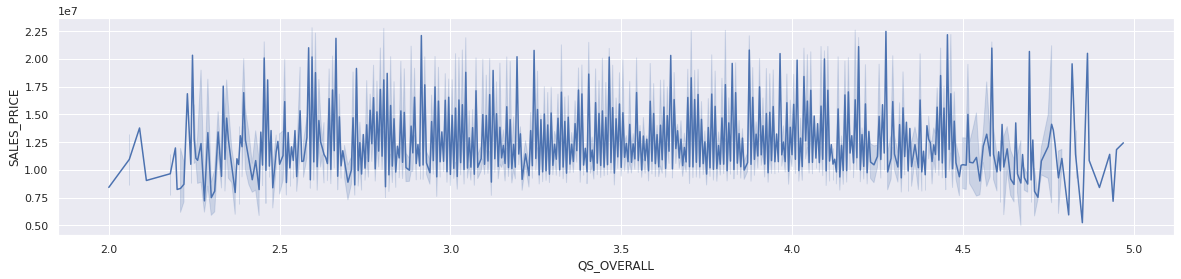

In [476]:
sns.lineplot(x='QS_OVERALL',y='SALES_PRICE',data=df)# Not linear relation, can be dropped.

In [477]:
df[['QS_OVERALL','SALES_PRICE']].corr()# NOT corelated

QS_OVERALL  SALES_PRICE
QS_OVERALL     1.000000     0.020556
SALES_PRICE    0.020556     1.000000

In [478]:
df=df.drop(['QS_OVERALL','QS_BEDROOM','QS_BATHROOM','QS_ROOMS'],axis='columns')
df.dtypes

AREA             object
INT_SQFT          int64
N_BEDROOM         int64
N_BATHROOM        int64
N_ROOM            int64
SALE_COND        object
PARK_FACIL       object
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
SALES_PRICE       int64
dtype: object

In [479]:
#Cleaning and EDA for following

In [480]:
#SALE_COND object

In [481]:
df['SALE_COND'].dtypes

dtype('O')

In [482]:
df.SALE_COND

0          AbNormal
1          AbNormal
2          AbNormal
3            Family
4          AbNormal
           ...     
7104        AdjLand
7105         Family
7106    Normal Sale
7107        Partial
7108        Partial
Name: SALE_COND, Length: 7109, dtype: object

In [483]:
#Data type is object, which is correct for SALE_COND column, which is categorical column

In [484]:
df.dtypes

AREA             object
INT_SQFT          int64
N_BEDROOM         int64
N_BATHROOM        int64
N_ROOM            int64
SALE_COND        object
PARK_FACIL       object
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
SALES_PRICE       int64
dtype: object

In [485]:
df.SALE_COND.isnull().sum()# NO NULL VALUE

0

In [486]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [487]:
#From above we can see duplicate categories with varying spelling, need to correct spelling and merge similar category

In [488]:
df.SALE_COND= df['SALE_COND'].replace( {"Adj Land":"AdjLand","Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial"} )

In [489]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [490]:
#Categorical column  no need for outlier treatment

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE_COND', ylabel='count'>

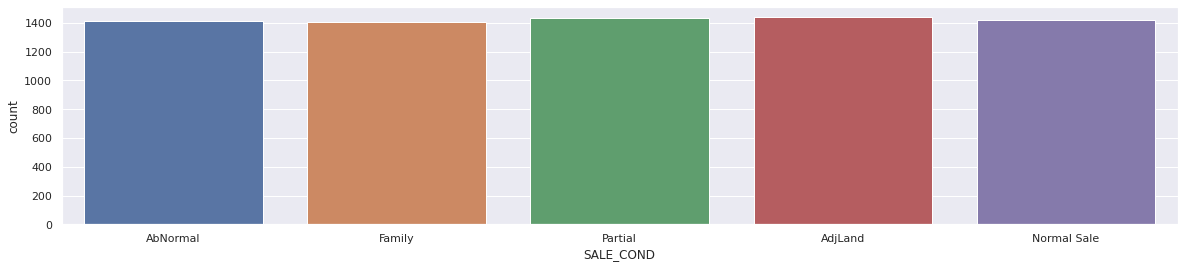

In [491]:
sns.countplot(df["SALE_COND"])

In [492]:
#From above we see its a balanced data set

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

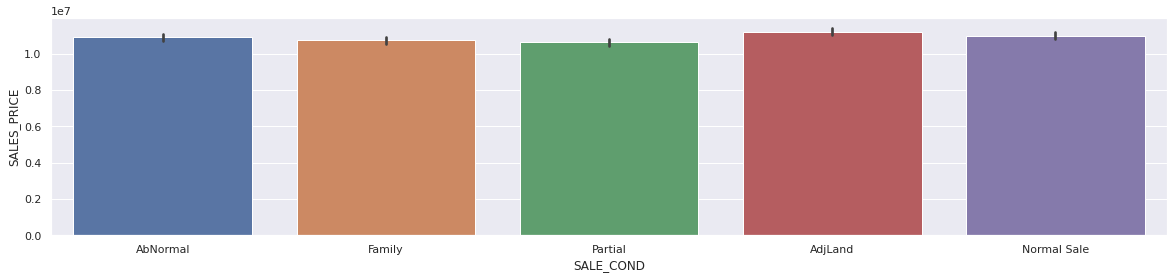

In [493]:
sns.barplot(x="SALE_COND",y="SALES_PRICE",data=df)

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

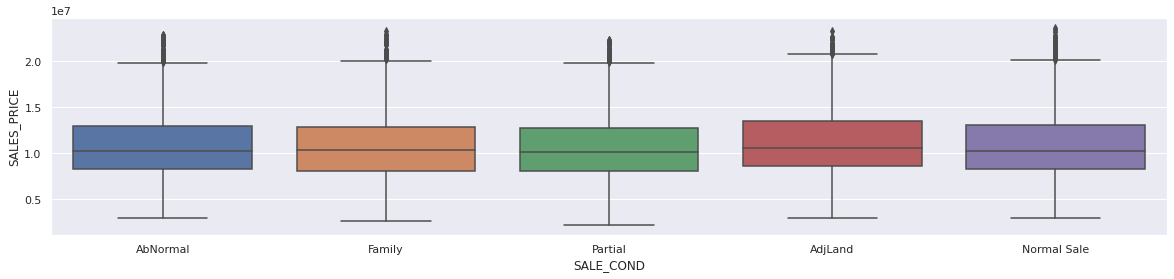

In [494]:
sns.boxplot(x="SALE_COND",y="SALES_PRICE",data=df)

In [495]:
#We can sales price remains same for all categories of property sale condition

In [496]:
#CLEANING AND EDA ON PARK_FACIL

In [497]:
#Check data type

In [498]:
df.PARK_FACIL.dtypes

dtype('O')

In [499]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [500]:
#From above we can see, its a binary categorical variable, so object is correct

In [501]:
#One of the category is Noo, which we can see is wrong spelling, it should be mapped to No

In [502]:
df.PARK_FACIL=df.PARK_FACIL.replace({"Noo":"No"})

In [503]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [504]:
#Check Null values

In [505]:
df.PARK_FACIL.isnull().sum()# No Null values

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PARK_FACIL', ylabel='count'>

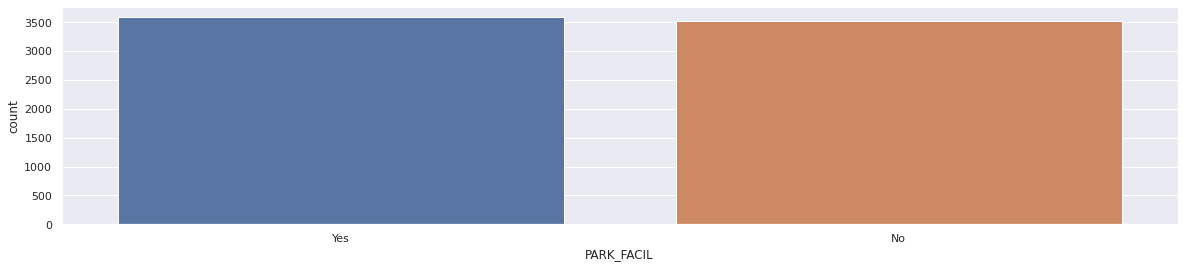

In [506]:
sns.countplot(df['PARK_FACIL'])

In [507]:
#Balanced Data set

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

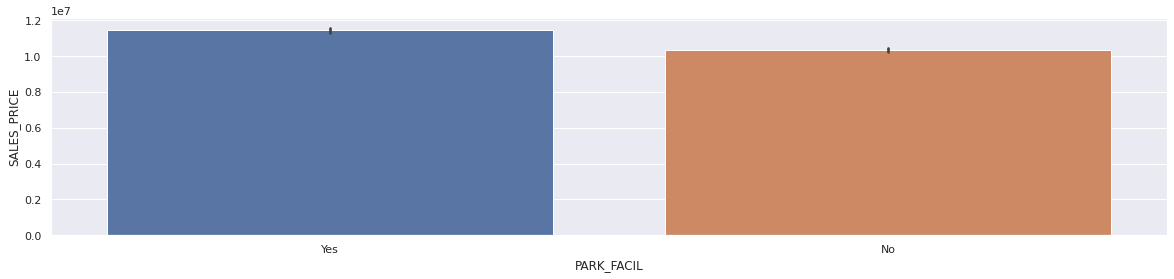

In [508]:
sns.barplot(x="PARK_FACIL",y="SALES_PRICE",data=df)

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

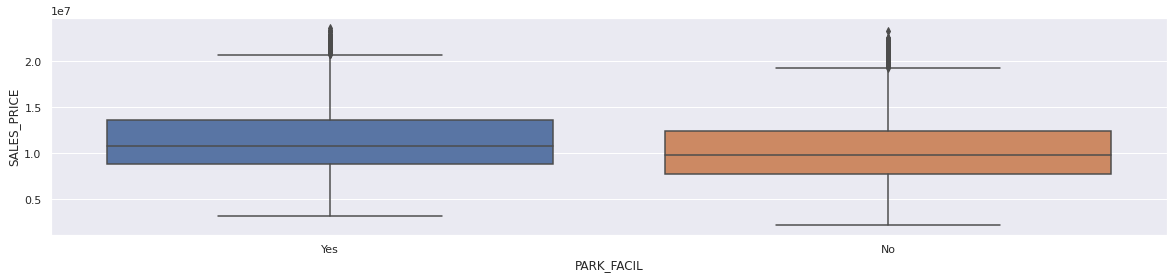

In [509]:
sns.boxplot(x="PARK_FACIL",y="SALES_PRICE",data=df)

In [510]:
#We can conclude with Parking facility the price is higher, compared to property with no parking facility

In [511]:
#Cleaning and EDA on BUILDTYPE feature

In [512]:
df.BUILDTYPE.dtypes

dtype('O')

In [513]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [514]:
#From above we can see, the feature is categorical, so its data type object is correct

In [515]:
# We can see some of categories are similar, but wrongly spelt, so correcting them


In [516]:
df.BUILDTYPE=df.BUILDTYPE.replace({"Other":"Others",'Comercial':"Commercial"})

In [517]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [518]:
df.BUILDTYPE.isnull().sum()

0

In [519]:
#No null values

In [520]:
#EDA 

<AxesSubplot:>

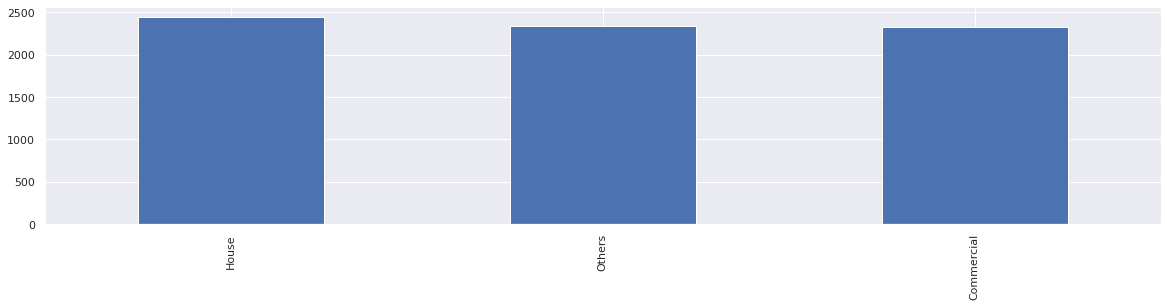

In [521]:
df.BUILDTYPE.value_counts().plot.bar()

In [522]:
#Interpretation sales are nearly equal in home, commercial and others segment

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

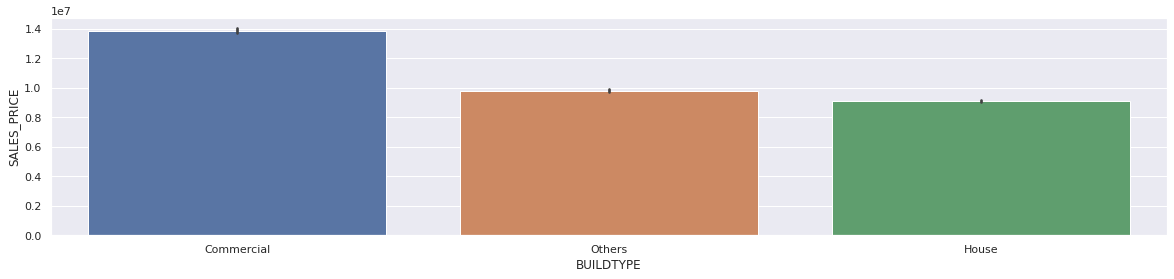

In [523]:
sns.barplot(x="BUILDTYPE",y="SALES_PRICE",data=df)

In [524]:
#Interpretation: We can see price of commercial property is higher compared to residentail properties, which is correct

In [525]:
#EDA and cleaning on UTILITY_AVAIL

In [526]:
df.UTILITY_AVAIL.dtypes

dtype('O')

In [527]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [528]:
#Data type is correct, its object

In [529]:
#ALL Pub category should be mapped to ALLPub

In [530]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.replace({"All Pub":"AllPub","NoSeWa":"NoSewr"})

In [531]:
df[df['UTILITY_AVAIL']=='NoSewr'].count()

AREA             1871
INT_SQFT         1871
N_BEDROOM        1871
N_BATHROOM       1871
N_ROOM           1871
SALE_COND        1871
PARK_FACIL       1871
BUILDTYPE        1871
UTILITY_AVAIL    1871
STREET           1871
MZZONE           1871
SALES_PRICE      1871
dtype: int64

In [532]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSewr     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [533]:
df.UTILITY_AVAIL.isnull().sum()

0

In [534]:
#No missing values

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='count'>

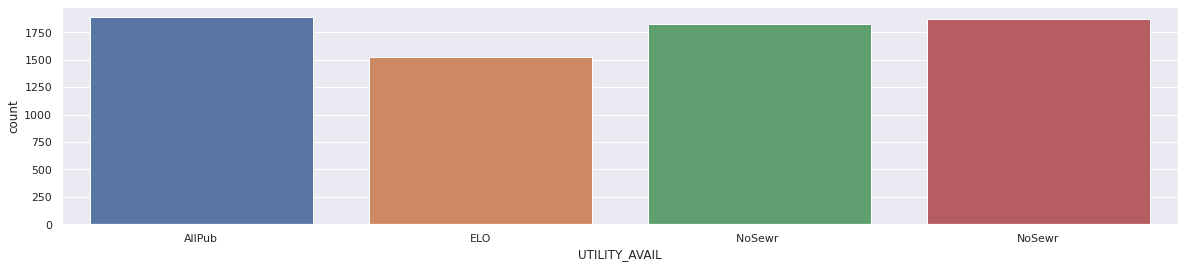

In [535]:
sns.countplot(df['UTILITY_AVAIL'])

In [536]:
#Maximum houses has AllPub utilities, and majority have all of them

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

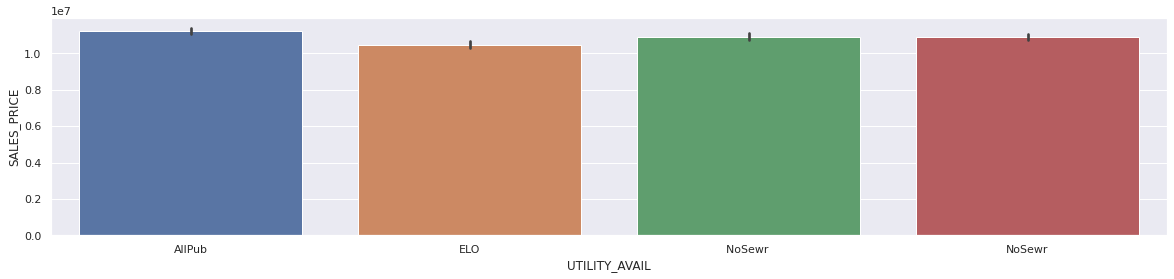

In [537]:
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=df)

In [538]:
#Interpretation sales price for properties with allpub utilities command little higher price than other properties

In [539]:
#Cleaning and EDA on STREET Feature

In [540]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [541]:
df.STREET.dtypes

dtype('O')

In [542]:
#Its a categorical column so data type of object is correct

In [543]:
#We need to merge No Access to  NoAccess, as both are same
df['STREET']=df['STREET'].replace({"No Access":"NoAccess","Pavd":"Paved"})

In [544]:
df.STREET.value_counts()

Paved       2572
Gravel      2520
NoAccess    2017
Name: STREET, dtype: int64

In [545]:
df['STREET'].isnull().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STREET', ylabel='count'>

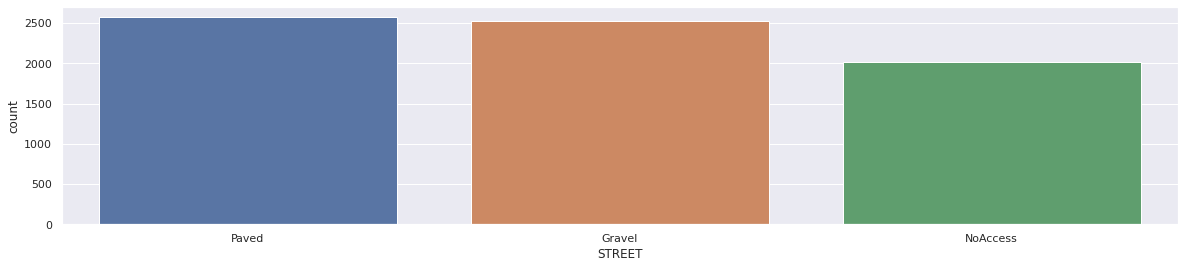

In [546]:
#Distribution Plot
sns.countplot(df['STREET'])

In [547]:
#Inference Maximum properties are on paved street, some properties dont have no access to streets

<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE'>

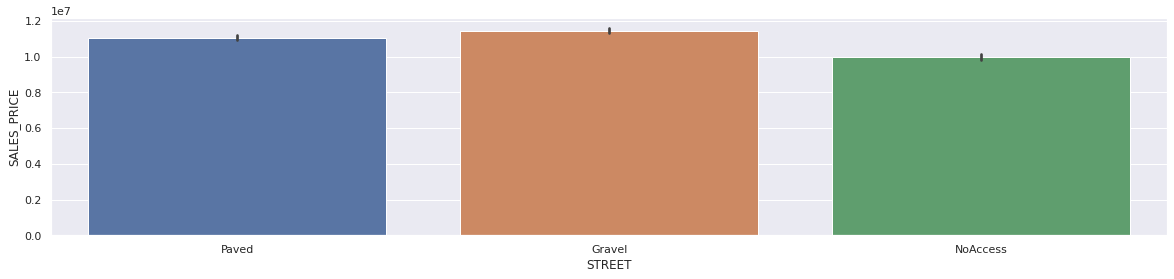

In [548]:
#STREET VS Sales Price
sns.barplot(x='STREET',y='SALES_PRICE',data=df)

In [549]:
#Gravel street have maximum price

In [550]:
#EDA on SALE_COND

In [551]:
df['SALE_COND'].dtypes# Categorical Variable, and object Data type is correct

dtype('O')

In [552]:
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [553]:
df.SALE_COND.isnull().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE_COND', ylabel='count'>

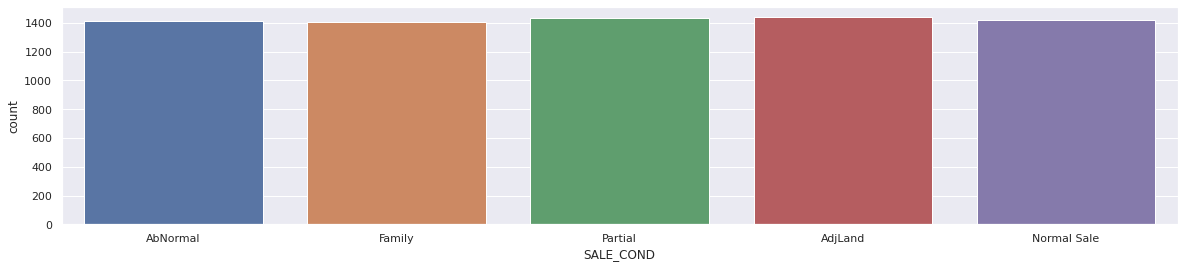

In [554]:
sns.countplot(df['SALE_COND'])#Interpretation sales are evenly spread across categories

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

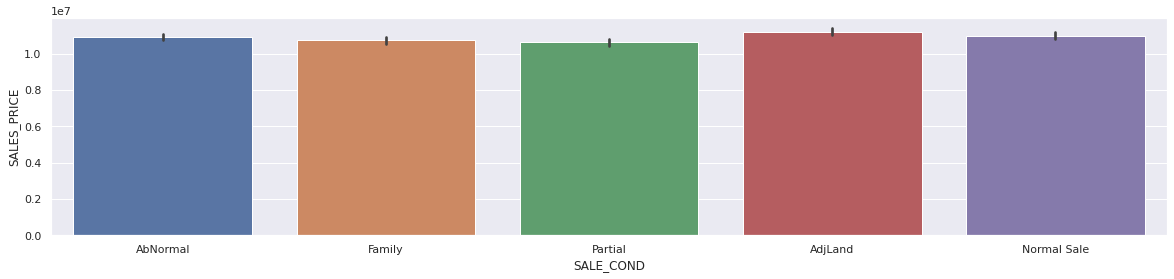

In [555]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df)# Sale price is higher for adjland property

In [556]:
#Cleaning AND EDA ON PARK_FACIL Column

In [557]:
df.PARK_FACIL.dtypes# Categorical Variable, and object Data type is correct

dtype('O')

In [558]:
df.PARK_FACIL.value_counts()#Balanced Data Set

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [559]:
df['PARK_FACIL'].isnull().sum()# No null values

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PARK_FACIL', ylabel='count'>

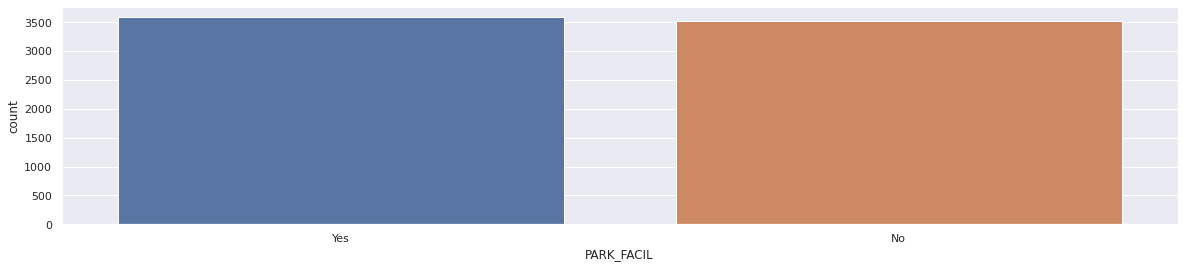

In [560]:
sns.countplot(df.PARK_FACIL)

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

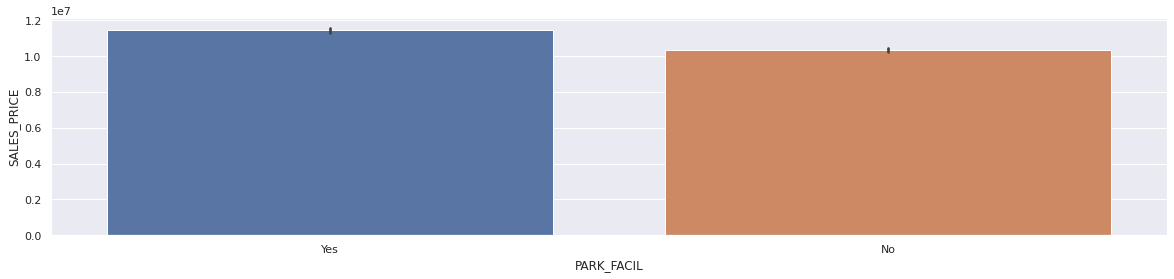

In [561]:
sns.barplot(x='PARK_FACIL',y="SALES_PRICE",data=df)

In [562]:
#Interpretation Sales Price for property with parking is higher , which is correct

In [563]:
#Cleaning AND EDA ON BUILDTYPE Column

In [564]:
df.BUILDTYPE.dtypes

dtype('O')

In [565]:
df.BUILDTYPE.value_counts()# Object is correct data type as categorical variable with 3 categ

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [566]:
df.BUILDTYPE.isnull().sum()# No null values

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BUILDTYPE', ylabel='count'>

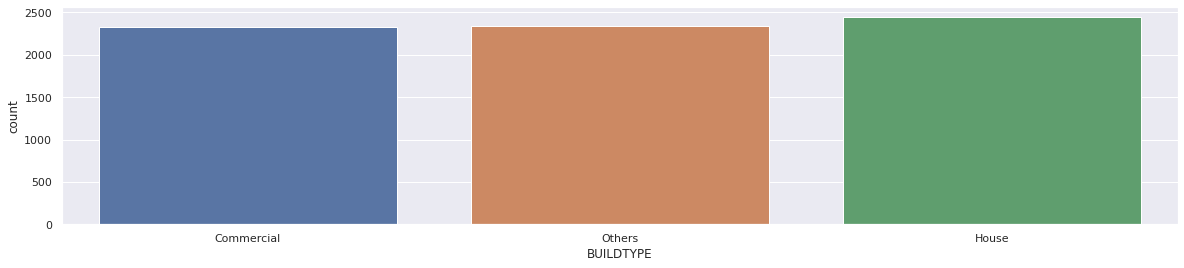

In [567]:
sns.countplot(df['BUILDTYPE'])#Nearly equal distribution

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

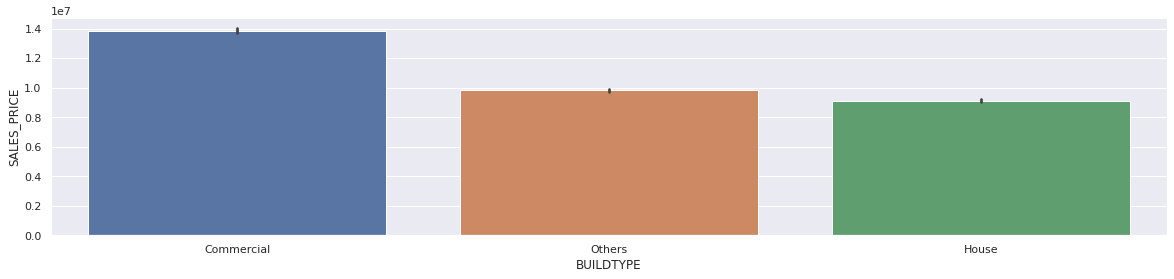

In [568]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)# Commercial property command higher price, which is correct

In [569]:
#Cleaning and EDA on UTILITY_AVAIL

In [570]:
df.UTILITY_AVAIL.dtypes# Categorical variable

dtype('O')

In [571]:
df.UTILITY_AVAIL.isnull().sum()# No null values

0

In [572]:
df.UTILITY_AVAIL.value_counts()#

AllPub     1887
NoSewr     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [573]:
#Checking for spelling, NoSewa should be mapped to NoSewr
#df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({'NoSeWa':'NoSewr'})

In [574]:
df.UTILITY_AVAIL.value_counts()#

AllPub     1887
NoSewr     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='count'>

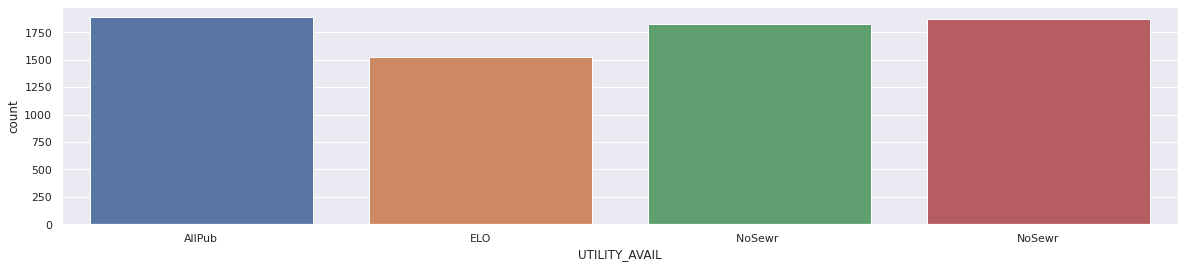

In [575]:
sns.countplot(df['UTILITY_AVAIL'])# Mostly equal distribution, barring ELO

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

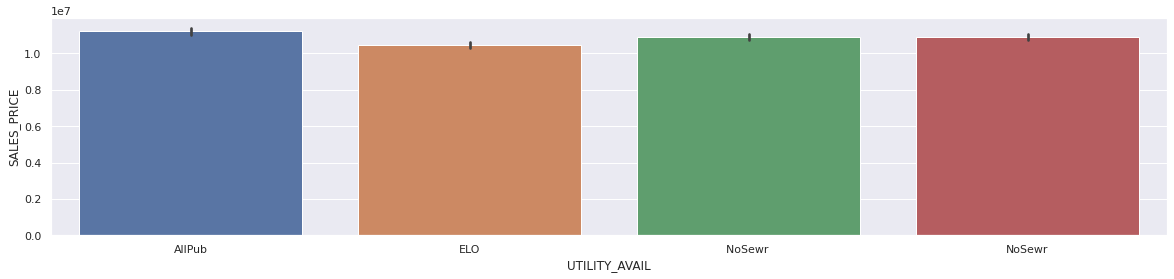

In [576]:
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df)# Sales price is same across all categories

In [577]:
#Cleaning and EDA on MZZONE object


In [578]:
df.MZZONE.dtypes#Categorical variable

dtype('O')

In [579]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [580]:
df.MZZONE.isnull().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MZZONE', ylabel='count'>

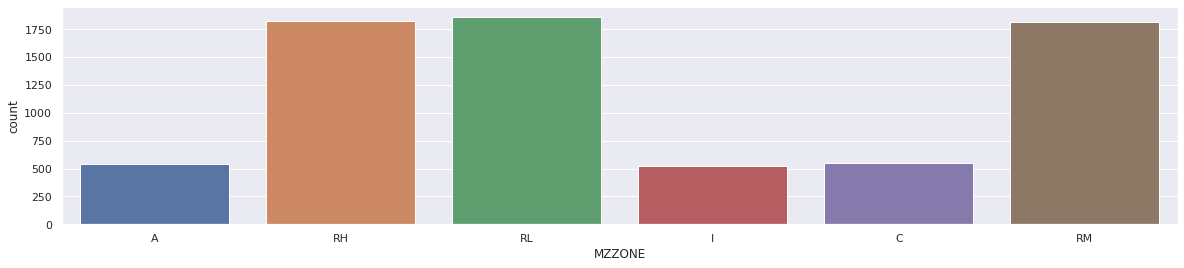

In [581]:
sns.countplot(df['MZZONE'])

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

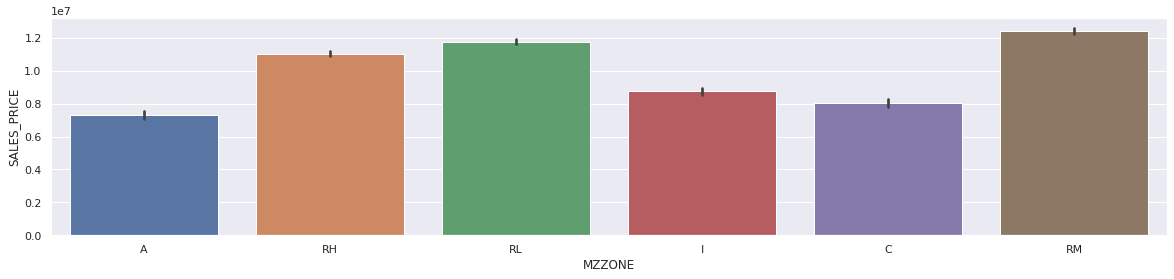

In [582]:
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df)# Interpretation Sales price is maxm with property having RM, RL,RH mzone

In [583]:
df.dtypes

AREA             object
INT_SQFT          int64
N_BEDROOM         int64
N_BATHROOM        int64
N_ROOM            int64
SALE_COND        object
PARK_FACIL       object
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
SALES_PRICE       int64
dtype: object

In [584]:
#Encode the Data

In [585]:
# IN Area column categories there should not be any order, all are equal.

In [586]:
# IN SALE_COND/PARK_FACIL/ BUILDTYPE/UTILITY_AVAIL/STREET/MZZONE  columns: there should not be any order in categories, all are equal.

In [587]:
#Using One Hot Encoding
# IN SALE_COND/PARK_FACIL/ BUILDTYPE/UTILITY_AVAIL/STREET/MZZONE  columns: there should not be any order in categories, all are equal.
df_enc = pd.get_dummies(df, columns = ['AREA', 'SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL',"STREET","MZZONE"])

In [588]:
df_enc.dtypes

INT_SQFT                 int64
N_BEDROOM                int64
N_BATHROOM               int64
N_ROOM                   int64
SALES_PRICE              int64
AREA_Adyar               uint8
AREA_AnnaNagar           uint8
AREA_Chrompet            uint8
AREA_KKNagar             uint8
AREA_Karapakkam          uint8
AREA_TNagar              uint8
AREA_Velachery           uint8
SALE_COND_AbNormal       uint8
SALE_COND_AdjLand        uint8
SALE_COND_Family         uint8
SALE_COND_Normal Sale    uint8
SALE_COND_Partial        uint8
PARK_FACIL_No            uint8
PARK_FACIL_Yes           uint8
BUILDTYPE_Commercial     uint8
BUILDTYPE_House          uint8
BUILDTYPE_Others         uint8
UTILITY_AVAIL_AllPub     uint8
UTILITY_AVAIL_ELO        uint8
UTILITY_AVAIL_NoSewr     uint8
UTILITY_AVAIL_NoSewr     uint8
STREET_Gravel            uint8
STREET_NoAccess          uint8
STREET_Paved             uint8
MZZONE_A                 uint8
MZZONE_C                 uint8
MZZONE_I                 uint8
MZZONE_R

In [589]:
df_enc.head()

INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  SALES_PRICE  AREA_Adyar  \
0      1004          1           1       3      7600000           0   
1      1986          2           1       5     21717770           0   
2       909          1           1       3     13159200           1   
3      1855          3           2       5      9630290           0   
4      1226          1           1       3      7406250           0   

   AREA_AnnaNagar  AREA_Chrompet  AREA_KKNagar  AREA_Karapakkam  ...  \
0               0              0             0                1  ...   
1               1              0             0                0  ...   
2               0              0             0                0  ...   
3               0              0             0                0  ...   
4               0              0             0                1  ...   

   UTILITY_AVAIL_NoSewr   STREET_Gravel  STREET_NoAccess  STREET_Paved  \
0                      0              0                0             1   
1                      0              1                0             0   
2                      0              1                0             0   
3                      1              0                0             1   
4                      0              1                0             0   

   MZZONE_A  MZZONE_C  MZZONE_I  MZZONE_RH  MZZONE_RL  MZZONE_RM  
0         1         0         0          0          0          0  
1         0         0         0          1          0          0  
2         0         0         0          0          1          0  
3         0         0         1          0          0          0  
4         0         1         0          0          0          0  

[5 rows x 35 columns]

In [590]:
df_enc.shape

(7109, 35)

In [ ]:
df_enc.corr()

In [629]:
#Split The Data Set
from sklearn.model_selection import train_test_split
y=df_enc['SALES_PRICE']
X=df_enc.drop("SALES_PRICE",axis='columns')

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


In [630]:
X_train

INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  AREA_Adyar  AREA_AnnaNagar  \
591        764          1           1       2           0               0   
2651      1848          2           1       5           0               1   
5737      1592          2           2       4           0               0   
5601      1303          1           1       3           0               0   
1114       790          1           1       2           1               0   
...        ...        ...         ...     ...         ...             ...   
1180      1042          1           1       3           0               0   
3441      1091          1           1       3           0               0   
1344      1864          3           2       5           0               0   
4623       917          1           1       3           0               0   
1289       897          1           1       3           0               0   

      AREA_Chrompet  AREA_KKNagar  AREA_Karapakkam  AREA_TNagar  ...  \
591               1             0                0            0  ...   
2651              0             0                0            0  ...   
5737              0             0                1            0  ...   
5601              0             1                0            0  ...   
1114              0             0                0            0  ...   
...             ...           ...              ...          ...  ...   
1180              0             0                1            0  ...   
3441              0             0                1            0  ...   
1344              0             0                0            0  ...   
4623              1             0                0            0  ...   
1289              1             0                0            0  ...   

      UTILITY_AVAIL_NoSewr   STREET_Gravel  STREET_NoAccess  STREET_Paved  \
591                       0              1                0             0   
2651                      1              0                0             1   
5737                      1              0                1             0   
5601                      0              1                0             0   
1114                      0              1                0             0   
...                     ...            ...              ...           ...   
1180                      0              0                0             1   
3441                      0              0                0             1   
1344                      1              1                0             0   
4623                      0              0                1             0   
1289                      0              0                1             0   

      MZZONE_A  MZZONE_C  MZZONE_I  MZZONE_RH  MZZONE_RL  MZZONE_RM  
591          0         0         0          0          0          1  
2651         0         0         0          0          0          1  
5737         1         0         0          0          0          0  
5601         0         0         0          1          0          0  
1114         0         0         1          0          0          0  
...        ...       ...       ...        ...        ...        ...  
1180         0         0         1          0          0          0  
3441         0         0         1          0          0          0  
1344         0         0         0          1          0          0  
4623         0         0         0          0          1          0  
1289         0         0         0          0          0          1  

[5687 rows x 34 columns]

In [631]:
#USE LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression


In [632]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [633]:
print(LR.intercept_)

4799686.820554561


In [653]:
print(LR.coef_) 
a=list(zip(LR.coef_,X.columns))
a

[ 3.92383724e+03  2.69482343e+05 -4.12630413e+05  1.47303502e+05
  4.73393567e+05  2.05588634e+06  5.29477736e+04 -1.51128210e+06
 -1.90183071e+06  2.20641526e+06 -1.37553014e+06  1.14587557e+03
  3.47167846e+05 -9.84664928e+04  5.54606873e+04 -3.05307916e+05
 -5.17962884e+05  5.17962884e+05  2.88945172e+06 -1.78484627e+06
 -1.10460546e+06  1.78282021e+05 -9.47753085e+04 -9.88714916e+04
  1.53647788e+04  5.58458942e+05 -5.94476285e+05  3.60173435e+04
 -1.43558261e+06 -8.84594642e+05 -3.28595743e+05  2.67116676e+05
  8.70618952e+05  1.51103737e+06]


[(3923.8372356782756, 'INT_SQFT'),
 (269482.3434994077, 'N_BEDROOM'),
 (-412630.41340504587, 'N_BATHROOM'),
 (147303.50228041274, 'N_ROOM'),
 (473393.5672567216, 'AREA_Adyar'),
 (2055886.3376691407, 'AREA_AnnaNagar'),
 (52947.77358155293, 'AREA_Chrompet'),
 (-1511282.0984136565, 'AREA_KKNagar'),
 (-1901830.706890286, 'AREA_Karapakkam'),
 (2206415.2629135656, 'AREA_TNagar'),
 (-1375530.1361166113, 'AREA_Velachery'),
 (1145.87556863156, 'SALE_COND_AbNormal'),
 (347167.84551802406, 'SALE_COND_AdjLand'),
 (-98466.49275163996, 'SALE_COND_Family'),
 (55460.68730701899, 'SALE_COND_Normal Sale'),
 (-305307.9156420556, 'SALE_COND_Partial'),
 (-517962.8842603668, 'PARK_FACIL_No'),
 (517962.884260399, 'PARK_FACIL_Yes'),
 (2889451.7247625203, 'BUILDTYPE_Commercial'),
 (-1784846.2689768285, 'BUILDTYPE_House'),
 (-1104605.4557855767, 'BUILDTYPE_Others'),
 (178282.02132052023, 'UTILITY_AVAIL_AllPub'),
 (-94775.30847343631, 'UTILITY_AVAIL_ELO'),
 (-98871.49163913111, 'UTILITY_AVAIL_NoSewr'),
 (15364.7

In [ ]:
#Factors Affecting Sales price

#House Price increases with increase on size of house, Number of Rooms/Bedroom, it increases if property is located in AnnaNagar and Tnagar
#Sales price are higher if property is located adjacent to land, increases if commercial property, higher if gravel street

In [635]:
y_pred = LR.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([15460874.59750998, 17818670.76277786, 14684790.74943356, ...,
        6453864.65538224, 15240852.89497248,  7494581.62271035])

In [636]:
#Evaluation Metrics
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9526001450993323


In [637]:
 d_test= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
 d_test


Actual     Predicted
461   15664740  1.546087e+07
3358  19286610  1.781867e+07
3751  13308490  1.468479e+07
2386  12496560  1.389845e+07
1125   9082000  8.481407e+06
...        ...           ...
6010  13104880  1.391873e+07
4903  14083210  1.408601e+07
6806   6835375  6.453865e+06
3832  14154820  1.524085e+07
364    7968490  7.494582e+06

[1422 rows x 2 columns]

In [ ]:
#USE Decision TREE Regressor

In [638]:
from sklearn.tree import DecisionTreeRegressor

In [639]:
DtReg=DecisionTreeRegressor()
DtReg.fit(X_train,y_train)

DecisionTreeRegressor()

In [640]:
print( DtReg.feature_importances_)

[3.91285911e-01 2.20025737e-04 3.14288084e-04 2.40600818e-04
 1.76963280e-04 1.61754914e-04 2.78649419e-04 2.61688752e-02
 1.18024124e-01 7.63132541e-04 6.27420413e-02 4.14857782e-04
 1.49264194e-03 4.83224185e-04 4.60981183e-04 8.45140554e-04
 8.61598131e-03 8.47767670e-03 3.19353892e-01 1.68250207e-03
 3.75892272e-03 7.42805485e-04 5.86461932e-04 6.13494357e-04
 3.96802240e-04 4.48874627e-03 5.88439420e-03 7.96931210e-04
 1.23929826e-02 6.18496711e-03 2.62765528e-03 2.63092297e-03
 4.51928618e-03 1.21723631e-02]


In [643]:
importance = DtReg.feature_importances_
print(X.columns)
list(zip(importance,X.columns))

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'AREA_Adyar',
       'AREA_AnnaNagar', 'AREA_Chrompet', 'AREA_KKNagar', 'AREA_Karapakkam',
       'AREA_TNagar', 'AREA_Velachery', 'SALE_COND_AbNormal',
       'SALE_COND_AdjLand', 'SALE_COND_Family', 'SALE_COND_Normal Sale',
       'SALE_COND_Partial', 'PARK_FACIL_No', 'PARK_FACIL_Yes',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'UTILITY_AVAIL_AllPub', 'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_NoSewr',
       'UTILITY_AVAIL_NoSewr ', 'STREET_Gravel', 'STREET_NoAccess',
       'STREET_Paved', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH',
       'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')


[(0.39128591139156166, 'INT_SQFT'),
 (0.00022002573676580198, 'N_BEDROOM'),
 (0.00031428808436378795, 'N_BATHROOM'),
 (0.00024060081849815645, 'N_ROOM'),
 (0.00017696327973988106, 'AREA_Adyar'),
 (0.0001617549135900423, 'AREA_AnnaNagar'),
 (0.0002786494190025738, 'AREA_Chrompet'),
 (0.02616887515528121, 'AREA_KKNagar'),
 (0.11802412412467533, 'AREA_Karapakkam'),
 (0.0007631325409052349, 'AREA_TNagar'),
 (0.06274204133190145, 'AREA_Velachery'),
 (0.0004148577817822078, 'SALE_COND_AbNormal'),
 (0.0014926419401125272, 'SALE_COND_AdjLand'),
 (0.00048322418464514757, 'SALE_COND_Family'),
 (0.000460981183239981, 'SALE_COND_Normal Sale'),
 (0.0008451405542627369, 'SALE_COND_Partial'),
 (0.008615981309526859, 'PARK_FACIL_No'),
 (0.008477676695015928, 'PARK_FACIL_Yes'),
 (0.31935389186884783, 'BUILDTYPE_Commercial'),
 (0.0016825020691565138, 'BUILDTYPE_House'),
 (0.0037589227205753473, 'BUILDTYPE_Others'),
 (0.0007428054853352422, 'UTILITY_AVAIL_AllPub'),
 (0.0005864619318248039, 'UTILITY_AVAIL

In [ ]:
#Which are Important Factors affecting Sales Price
#Based on above data it is size of property in INT_SQFT and if its commercial property it is fetching more price
#Developers can use these features to develop properties and maximize profit

In [626]:
#Evaluation Metric
# Compute y_pred
y_pred_DtR = DtReg.predict(X_test)

# Compute mse_dt
rsquared = r2_score(y_test,y_pred_DtR)
# Compute rmse_dt


# Print rmse_dt
print("Test set R2 of dt: {:.2f}".format(rsquared))

Test set R2 of dt: 0.97


In [ ]:
#USE Random Forest  REGRESSOR

In [654]:
from sklearn.ensemble import RandomForestRegressor

In [672]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')

In [673]:
# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

In [674]:
#r2_score(baseline_preds, original_test_labels)
r2_score(y_test,predictions)

0.9821364053946993

In [675]:
importances_rf = list(rf.feature_importances_)
list(zip(importances_rf,X.columns))

[(0.18403882794539034, 'INT_SQFT'),
 (0.041791896818030944, 'N_BEDROOM'),
 (0.010657493917713033, 'N_BATHROOM'),
 (0.11686410171698176, 'N_ROOM'),
 (0.0058872571889794735, 'AREA_Adyar'),
 (0.05468840852540914, 'AREA_AnnaNagar'),
 (0.012232420820670779, 'AREA_Chrompet'),
 (0.007991084952334726, 'AREA_KKNagar'),
 (0.07150242323043608, 'AREA_Karapakkam'),
 (0.03786194277004357, 'AREA_TNagar'),
 (0.015330797042356672, 'AREA_Velachery'),
 (0.002071782264337429, 'SALE_COND_AbNormal'),
 (0.0030807418786769672, 'SALE_COND_AdjLand'),
 (0.002307992550317832, 'SALE_COND_Family'),
 (0.0023506000937852387, 'SALE_COND_Normal Sale'),
 (0.0028032250564743676, 'SALE_COND_Partial'),
 (0.009765816613912553, 'PARK_FACIL_No'),
 (0.008750782703222566, 'PARK_FACIL_Yes'),
 (0.19140558790658338, 'BUILDTYPE_Commercial'),
 (0.07642266289398382, 'BUILDTYPE_House'),
 (0.04061906438750859, 'BUILDTYPE_Others'),
 (0.0028292508932302118, 'UTILITY_AVAIL_AllPub'),
 (0.0027299972989808926, 'UTILITY_AVAIL_ELO'),
 (0.00246

In [ ]:
#Interpretation Sales Price increases with size of house/Number of Rooms/Commercial Property. Developers can use these features to sell
#properties